# CHM13 Reference Genome Centromere Analysis
All the analyses below pertain to ONLY THE REFERENCE GENOME CHM13

JUST KIDDING WE ADDED HG38

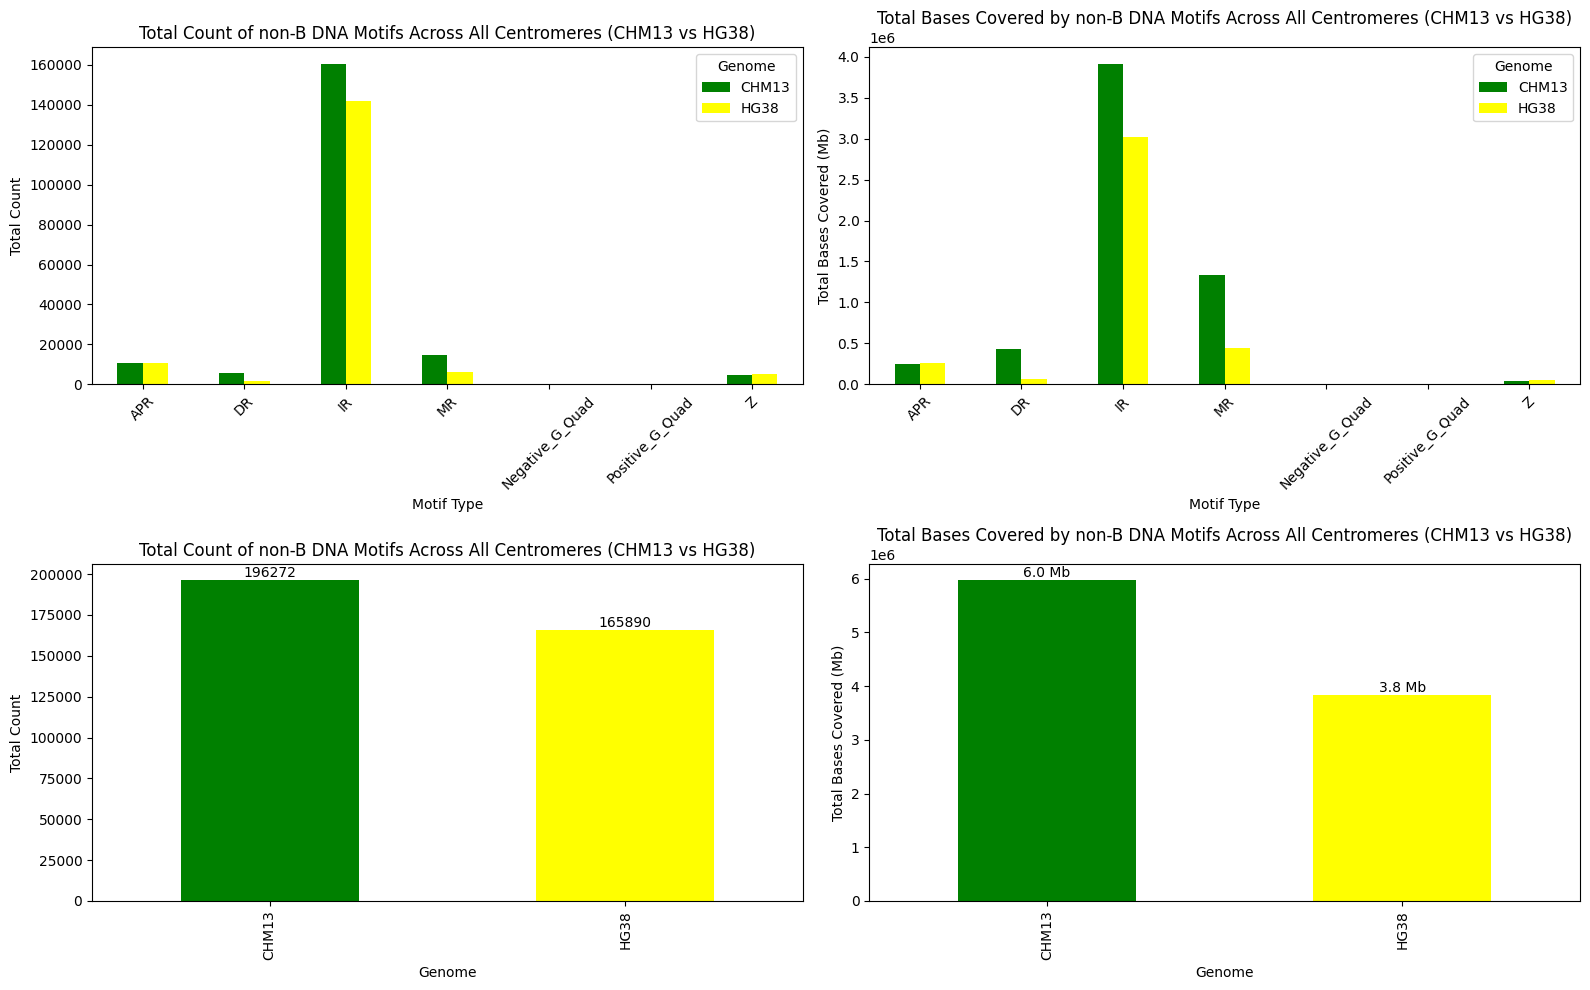

         Motif Type Genome  Total_Count  Total_Bases_Covered
0               APR  CHM13        10741               249137
1               APR   HG38        10938               255769
2                DR  CHM13         5576               427282
3                DR   HG38         1650                69038
4                IR  CHM13       160614              3915772
5                IR   HG38       142046              3013931
6                MR  CHM13        14755              1336060
7                MR   HG38         6097               443962
8   Negative_G_Quad  CHM13           18                  808
9   Negative_G_Quad   HG38           95                 3543
10  Positive_G_Quad  CHM13           42                 1396
11  Positive_G_Quad   HG38           97                 3798
12                Z  CHM13         4526                43075
13                Z   HG38         4967                47959


In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV files for CHM13
chm13_quadron_df = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/chm13_quadron_collapsed_summary_metrics_centromeres.csv')
chm13_nonb_df = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/chm13_collapsed_summary_metrics_centromere.csv')

# Load data from CSV files for HG38
hg38_quadron_df = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/hg38_quadron_collapsed_summary_metrics.csv')
hg38_nonb_df = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/hg38_collapsed_summary_metrics_centromere.csv')

# Ensure column names match between the dataframes
chm13_quadron_df = chm13_quadron_df.rename(columns={"Total Base Coverage": "Total Bases Covered"})
chm13_nonb_df = chm13_nonb_df.rename(columns={"Sample_Haplotype_Chromosome": "Sample_Haplotype"})

hg38_quadron_df = hg38_quadron_df.rename(columns={"Total Base Coverage": "Total Bases Covered"})
hg38_nonb_df = hg38_nonb_df.rename(columns={"Sample_Haplotype_Chromosome": "Sample_Haplotype"})

# Add genome type to distinguish between CHM13 and HG38
chm13_quadron_df['Genome'] = 'CHM13'
chm13_nonb_df['Genome'] = 'CHM13'
hg38_quadron_df['Genome'] = 'HG38'
hg38_nonb_df['Genome'] = 'HG38'

# Concatenate all dataframes
combined_df = pd.concat([chm13_quadron_df, chm13_nonb_df, hg38_quadron_df, hg38_nonb_df], ignore_index=True)

# Group by 'Motif Type' and 'Genome' to calculate total count and total bases covered
summary_table = combined_df.groupby(['Motif Type', 'Genome']).agg(
    Total_Count=('Total Count', 'sum'),
    Total_Bases_Covered=('Total Bases Covered', 'sum')
).reset_index()

# Plot total count of motifs
plt.figure(figsize=(16, 10))

# Plot for total count
plt.subplot(2, 2, 1)
count_ax = plt.gca()
combined_df.groupby(['Motif Type', 'Genome'])['Total Count'].sum().unstack().plot(kind='bar', ax=count_ax, color=['green', 'yellow'])
count_ax.set_title('Total Count of non-B DNA Motifs Across All Centromeres (CHM13 vs HG38)')
count_ax.set_xlabel('Motif Type')
count_ax.set_ylabel('Total Count')
count_ax.set_xticklabels(count_ax.get_xticklabels(), rotation=45)

# Plot for total bases covered
plt.subplot(2, 2, 2)
bases_ax = plt.gca()
combined_df.groupby(['Motif Type', 'Genome'])['Total Bases Covered'].sum().unstack().plot(kind='bar', ax=bases_ax, color=['green', 'yellow'])
bases_ax.set_title('Total Bases Covered by non-B DNA Motifs Across All Centromeres (CHM13 vs HG38)')
bases_ax.set_xlabel('Motif Type')
bases_ax.set_ylabel('Total Bases Covered (Mb)')
bases_ax.set_xticklabels(bases_ax.get_xticklabels(), rotation=45)

# New Plot: Total Counts for CHM13 and HG38 (Overall)
plt.subplot(2, 2, 3)
total_counts = combined_df.groupby('Genome')['Total Count'].sum()
count_bar = total_counts.plot(kind='bar', color=['green', 'yellow'])
count_bar.set_title('Total Count of non-B DNA Motifs Across All Centromeres (CHM13 vs HG38)')
count_bar.set_xlabel('Genome')
count_bar.set_ylabel('Total Count')

# Add value labels for counts
for i, v in enumerate(total_counts):
    count_bar.text(i, v, f'{v:.0f}', ha='center', va='bottom')

# New Plot: Total Bases Covered for CHM13 and HG38 (Overall)
plt.subplot(2, 2, 4)
total_bases_covered = combined_df.groupby('Genome')['Total Bases Covered'].sum()
bases_bar = total_bases_covered.plot(kind='bar', color=['green', 'yellow'])
bases_bar.set_title('Total Bases Covered by non-B DNA Motifs Across All Centromeres (CHM13 vs HG38)')
bases_bar.set_xlabel('Genome')
bases_bar.set_ylabel('Total Bases Covered (Mb)')

# Add value labels for total bases covered
for i, v in enumerate(total_bases_covered):
    bases_bar.text(i, v, f'{v/1e6:.1f} Mb', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(summary_table)

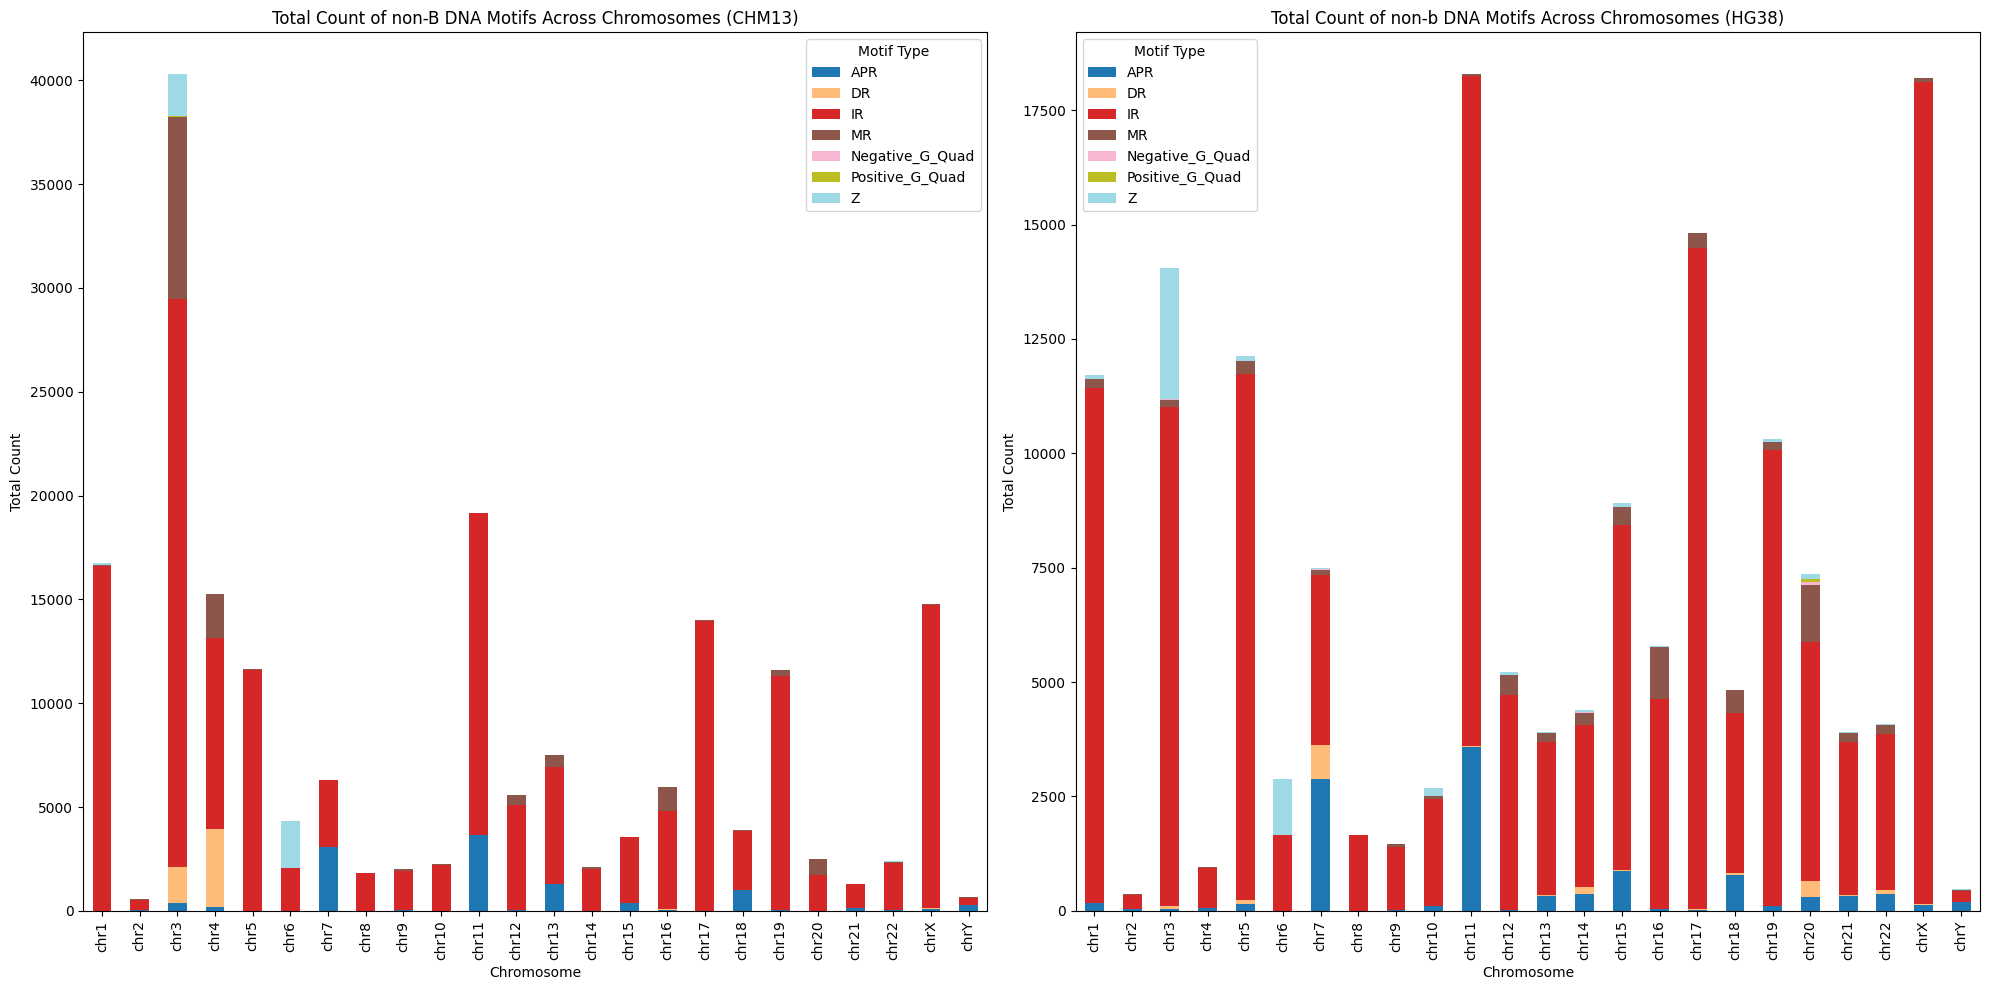

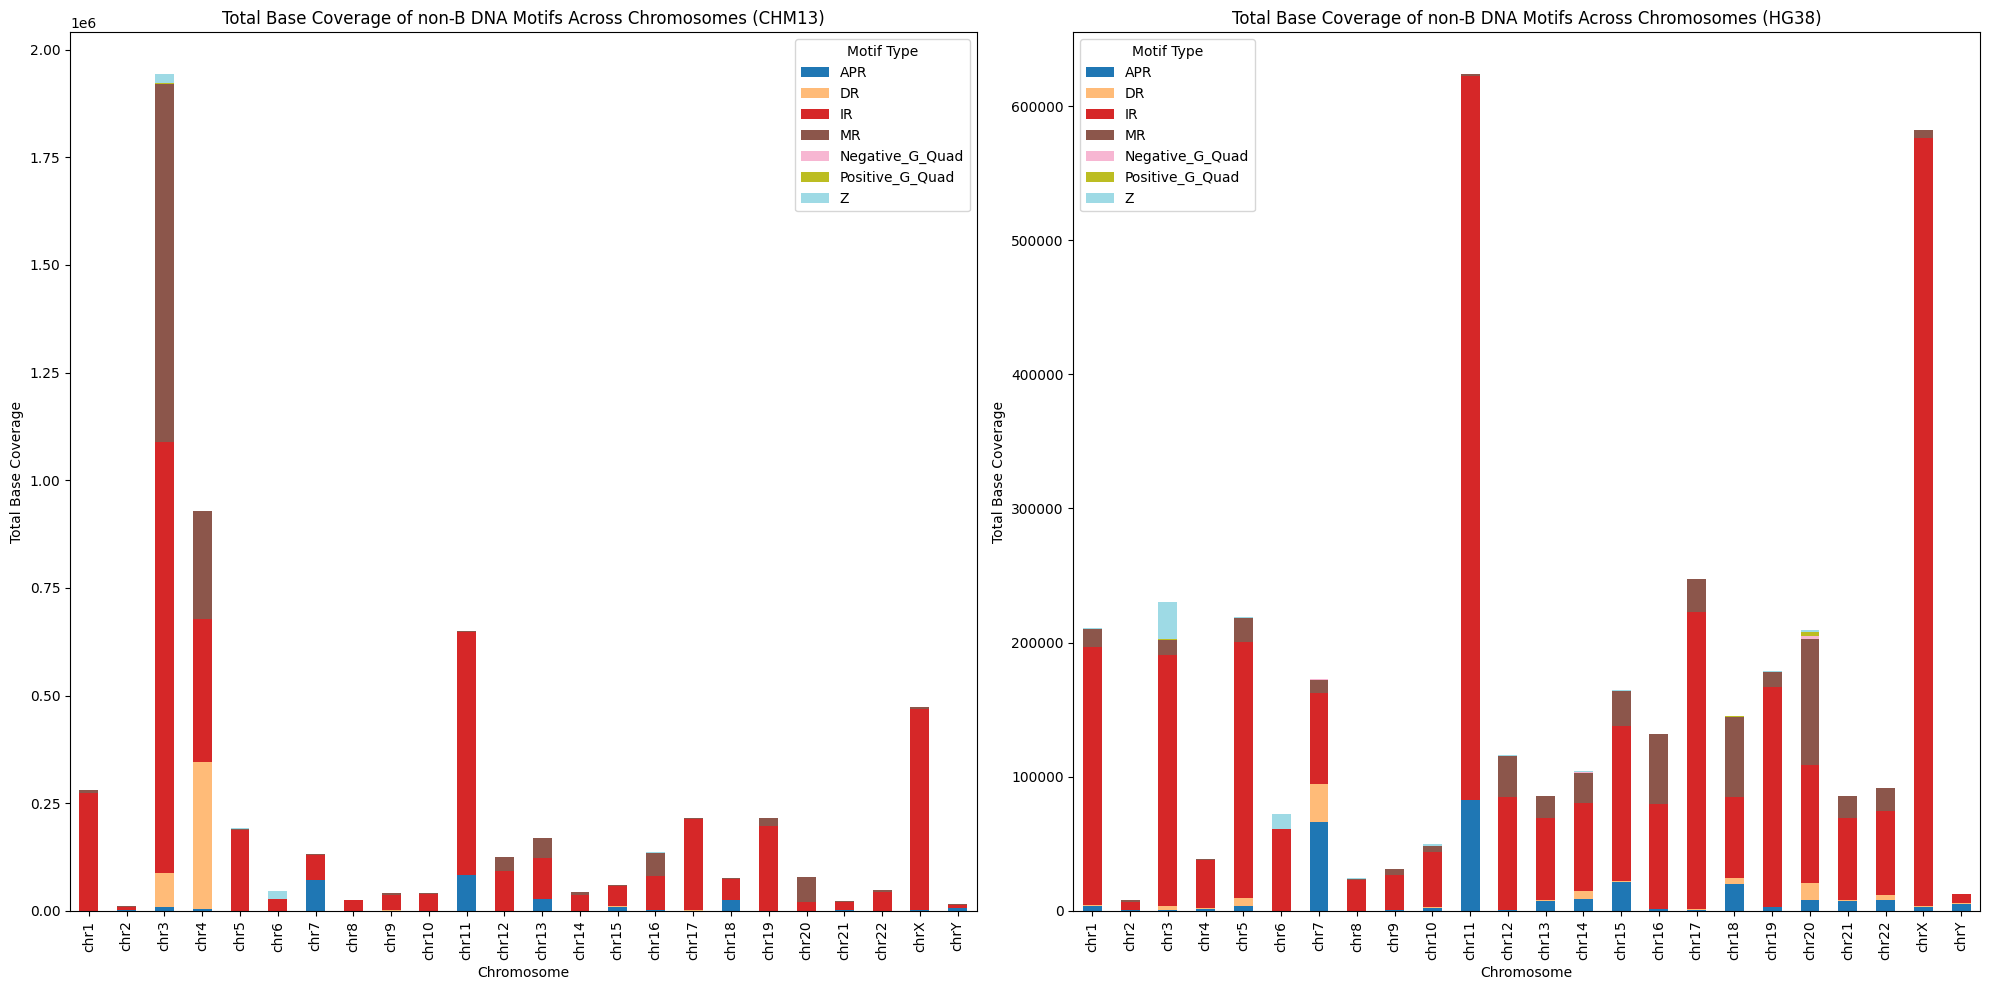

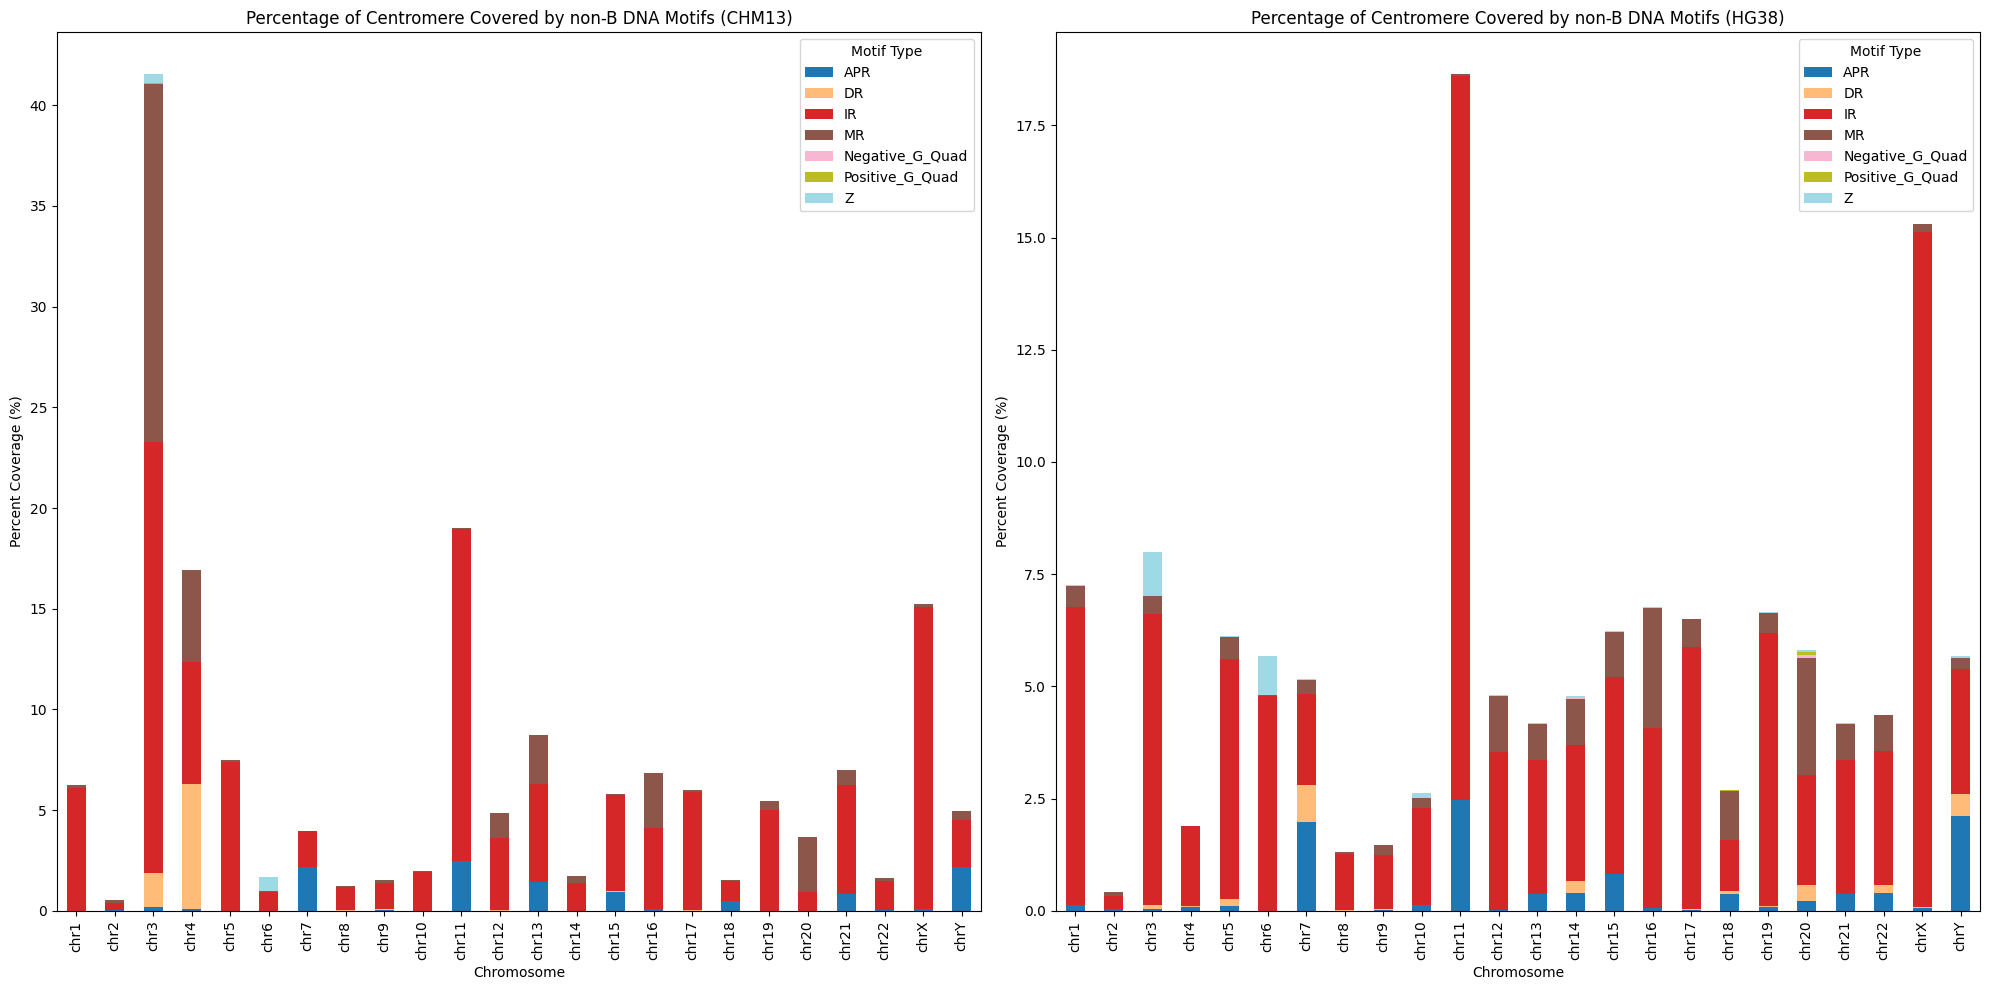

<Figure size 2000x800 with 0 Axes>

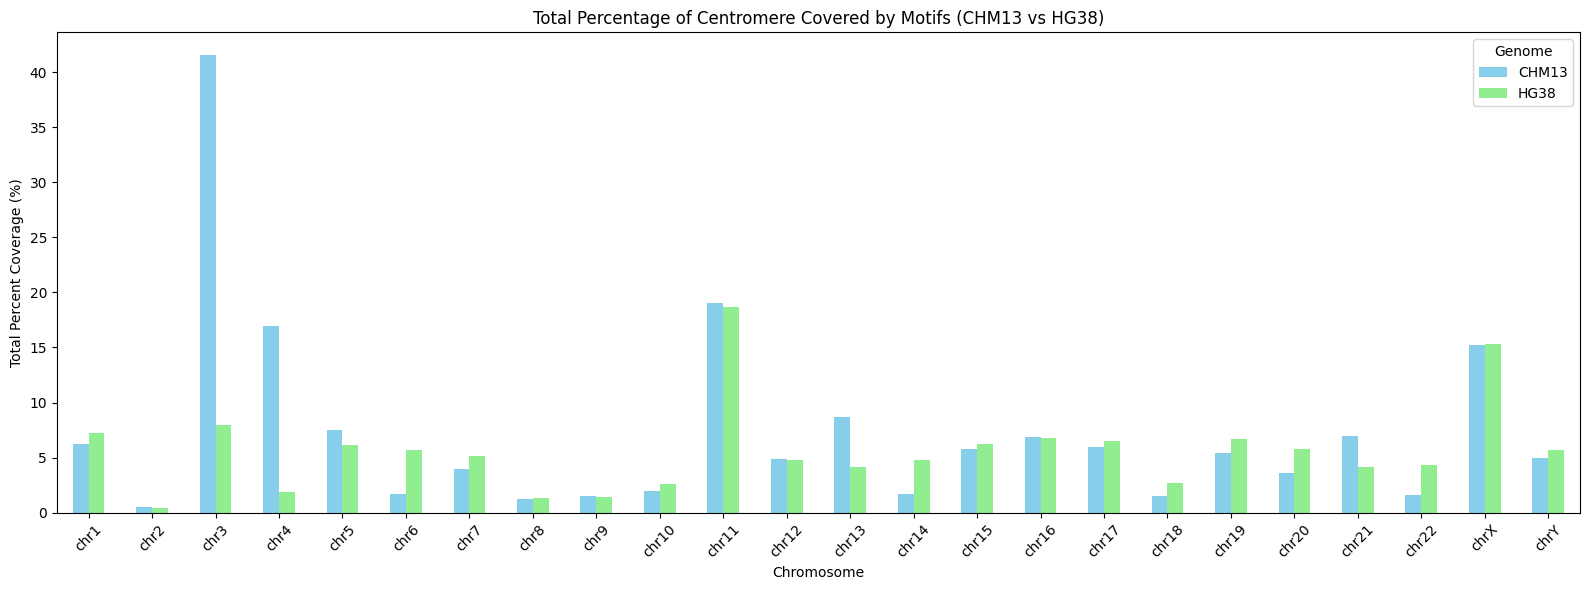

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV files for CHM13
chm13_quadron_df = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/chm13_quadron_collapsed_summary_metrics_centromeres.csv')
chm13_nonb_df = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/chm13_collapsed_summary_metrics_centromere.csv')

# Load data from CSV files for HG38
hg38_quadron_df = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/hg38_quadron_collapsed_summary_metrics.csv')
hg38_nonb_df = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/hg38_collapsed_summary_metrics_centromere.csv')

# Ensure column names match between the dataframes
chm13_quadron_df = chm13_quadron_df.rename(columns={"Total Base Coverage": "Total Bases Covered"})
chm13_nonb_df = chm13_nonb_df.rename(columns={"Sample_Haplotype_Chromosome": "Sample_Haplotype"})
hg38_quadron_df = hg38_quadron_df.rename(columns={"Total Base Coverage": "Total Bases Covered"})
hg38_nonb_df = hg38_nonb_df.rename(columns={"Sample_Haplotype_Chromosome": "Sample_Haplotype"})

# Extract chromosome information
chm13_quadron_df['Chromosome'] = chm13_quadron_df['Sample_Haplotype'].str.extract(r'(chr[0-9XY]+)')
chm13_nonb_df['Chromosome'] = chm13_nonb_df['Sample_Haplotype'].str.extract(r'(chr[0-9XY]+)')
hg38_quadron_df['Chromosome'] = hg38_quadron_df['Sample_Haplotype'].str.extract(r'(chr[0-9XY]+)')
hg38_nonb_df['Chromosome'] = hg38_nonb_df['Sample_Haplotype'].str.extract(r'(chr[0-9XY]+)')

# Add genome type
chm13_quadron_df['Genome'] = 'CHM13'
chm13_nonb_df['Genome'] = 'CHM13'
hg38_quadron_df['Genome'] = 'HG38'
hg38_nonb_df['Genome'] = 'HG38'

# Concatenate the dataframes
combined_df = pd.concat([chm13_quadron_df, chm13_nonb_df, hg38_quadron_df, hg38_nonb_df], ignore_index=True)

# Add centromere lengths for CHM13 in megabases (Mb)
chm13_centromere_lengths = {
    'chr1': 4.504439,
    'chr2': 2.33948,
    'chr3': 4.677024,
    'chr4': 5.494641,
    'chr5': 2.557491,
    'chr6': 2.771684,
    'chr7': 3.300127,
    'chr8': 2.109248,
    'chr9': 2.63082,
    'chr10': 2.030796,
    'chr11': 3.415049,
    'chr12': 2.581652,
    'chr13': 1.950698,
    'chr14': 2.616299,
    'chr15': 1.015672,
    'chr16': 1.981235,
    'chr17': 3.59452,
    'chr18': 4.967851,
    'chr19': 3.950495,
    'chr20': 2.173803,
    'chr21': 0.343352,
    'chr22': 2.922885,
    'chrX': 3.106918,
    'chrY': 0.317335
}

# HG38 centromere lengths calculated earlier (in Mb)
hg38_centromere_lengths = {
    'chr1': 2.906265,
    'chr2': 1.902412,
    'chr3': 2.883116,
    'chr4': 2.031890,
    'chr5': 3.573907,
    'chr6': 1.276046,
    'chr7': 3.358367,
    'chr8': 1.843521,
    'chr9': 2.128923,
    'chr10': 1.906839,
    'chr11': 3.346726,
    'chr12': 2.415845,
    'chr13': 2.051248,
    'chr14': 2.173523,
    'chr15': 2.641581,
    'chr16': 1.954511,
    'chr17': 3.802485,
    'chr18': 5.400307,
    'chr19': 2.691894,
    'chr20': 3.602116,
    'chr21': 2.051248,
    'chr22': 2.099530,
    'chrX': 3.806963,
    'chrY': 0.227095
}

# Create a combined mapping of centromere lengths for both genomes
combined_centromere_lengths = {
    'CHM13': chm13_centromere_lengths,
    'HG38': hg38_centromere_lengths
}

# Map the lengths for both CHM13 and HG38 to the dataframe
combined_df['Centromere Length (Mb)'] = combined_df.apply(
    lambda row: combined_centromere_lengths[row['Genome']][row['Chromosome']], axis=1
)

# Calculate percentage of centromere covered by motifs
combined_df['Percent Coverage'] = (combined_df['Total Bases Covered'] / (combined_df['Centromere Length (Mb)'] * 1e6)) * 100

# Define chromosome order for consistent plotting
chromosome_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']
combined_df['Chromosome'] = pd.Categorical(combined_df['Chromosome'], categories=chromosome_order, ordered=True)

# Separate CHM13 and HG38 for side-by-side comparison
chm13_df = combined_df[combined_df['Genome'] == 'CHM13']
hg38_df = combined_df[combined_df['Genome'] == 'HG38']

# Plot total count of motifs side by side for CHM13 and HG38
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
chm13_count_plot = chm13_df.groupby(['Chromosome', 'Motif Type'], observed=False)['Total Count'].sum().unstack().plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab20')
plt.title('Total Count of non-B DNA Motifs Across Chromosomes (CHM13)')
plt.xlabel('Chromosome')
plt.ylabel('Total Count')

plt.subplot(1, 2, 2)
hg38_count_plot = hg38_df.groupby(['Chromosome', 'Motif Type'], observed=False)['Total Count'].sum().unstack().plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab20')
plt.title('Total Count of non-b DNA Motifs Across Chromosomes (HG38)')
plt.xlabel('Chromosome')
plt.ylabel('Total Count')

plt.tight_layout()
plt.show()

# Plot total base coverage side by side for CHM13 and HG38
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
chm13_coverage_plot = chm13_df.groupby(['Chromosome', 'Motif Type'], observed=False)['Total Bases Covered'].sum().unstack().plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab20')
plt.title('Total Base Coverage of non-B DNA Motifs Across Chromosomes (CHM13)')
plt.xlabel('Chromosome')
plt.ylabel('Total Base Coverage')

plt.subplot(1, 2, 2)
hg38_coverage_plot = hg38_df.groupby(['Chromosome', 'Motif Type'], observed=False)['Total Bases Covered'].sum().unstack().plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab20')
plt.title('Total Base Coverage of non-B DNA Motifs Across Chromosomes (HG38)')
plt.xlabel('Chromosome')
plt.ylabel('Total Base Coverage')

plt.tight_layout()
plt.show()

# Plot percentage of centromere covered by motifs side by side for CHM13 and HG38
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
chm13_percent_plot = chm13_df.groupby(['Chromosome', 'Motif Type'], observed=False)['Percent Coverage'].sum().unstack().plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab20')
plt.title('Percentage of Centromere Covered by non-B DNA Motifs (CHM13)')
plt.xlabel('Chromosome')
plt.ylabel('Percent Coverage (%)')

plt.subplot(1, 2, 2)
hg38_percent_plot = hg38_df.groupby(['Chromosome', 'Motif Type'], observed=False)['Percent Coverage'].sum().unstack().plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab20')
plt.title('Percentage of Centromere Covered by non-B DNA Motifs (HG38)')
plt.xlabel('Chromosome')
plt.ylabel('Percent Coverage (%)')

plt.tight_layout()
plt.show()

# Group by Chromosome and Genome, summing the Percent Coverage for all features in each chromosome
chm13_chromosome_percent = chm13_df.groupby('Chromosome', observed=True)['Percent Coverage'].sum()
hg38_chromosome_percent = hg38_df.groupby('Chromosome', observed=True)['Percent Coverage'].sum()

# Create a dataframe for easy comparison
percent_df = pd.DataFrame({
    'CHM13': chm13_chromosome_percent,
    'HG38': hg38_chromosome_percent
})

# Plot side-by-side comparison for each chromosome
plt.figure(figsize=(20, 8))
percent_df.plot(kind='bar', figsize=(16, 6), color=['skyblue', 'lightgreen'])
plt.title('Total Percentage of Centromere Covered by Motifs (CHM13 vs HG38)')
plt.xlabel('Chromosome')
plt.ylabel('Total Percent Coverage (%)')
plt.xticks(rotation=45)
plt.legend(title='Genome')



plt.tight_layout()
plt.show()

# VERKKO BATCH 123 Complete and Accurate Centromeric Regions non-B Annotations
All the analyses below pertain to the annotation of the complete and accurate centromeric regions provided by Glennis Logsdon 

Total number of centromeres per chromosome:
   Chromosome  Total Centromeres
0        chr1                 32
11       chr2                 44
15       chr3                 18
16       chr4                 31
17       chr5                 25
18       chr6                 39
19       chr7                 28
20       chr8                 45
21       chr9                 39
1       chr10                 48
2       chr11                 29
3       chr12                 39
4       chr13                 29
5       chr14                 58
6       chr15                 52
7       chr16                 30
8       chr17                 32
9       chr18                 20
10      chr19                 30
12      chr20                 30
13      chr21                 45
14      chr22                 33
22       chrX                 32
23       chrY                 14

Total number of centromeres across all chromosomes: 822


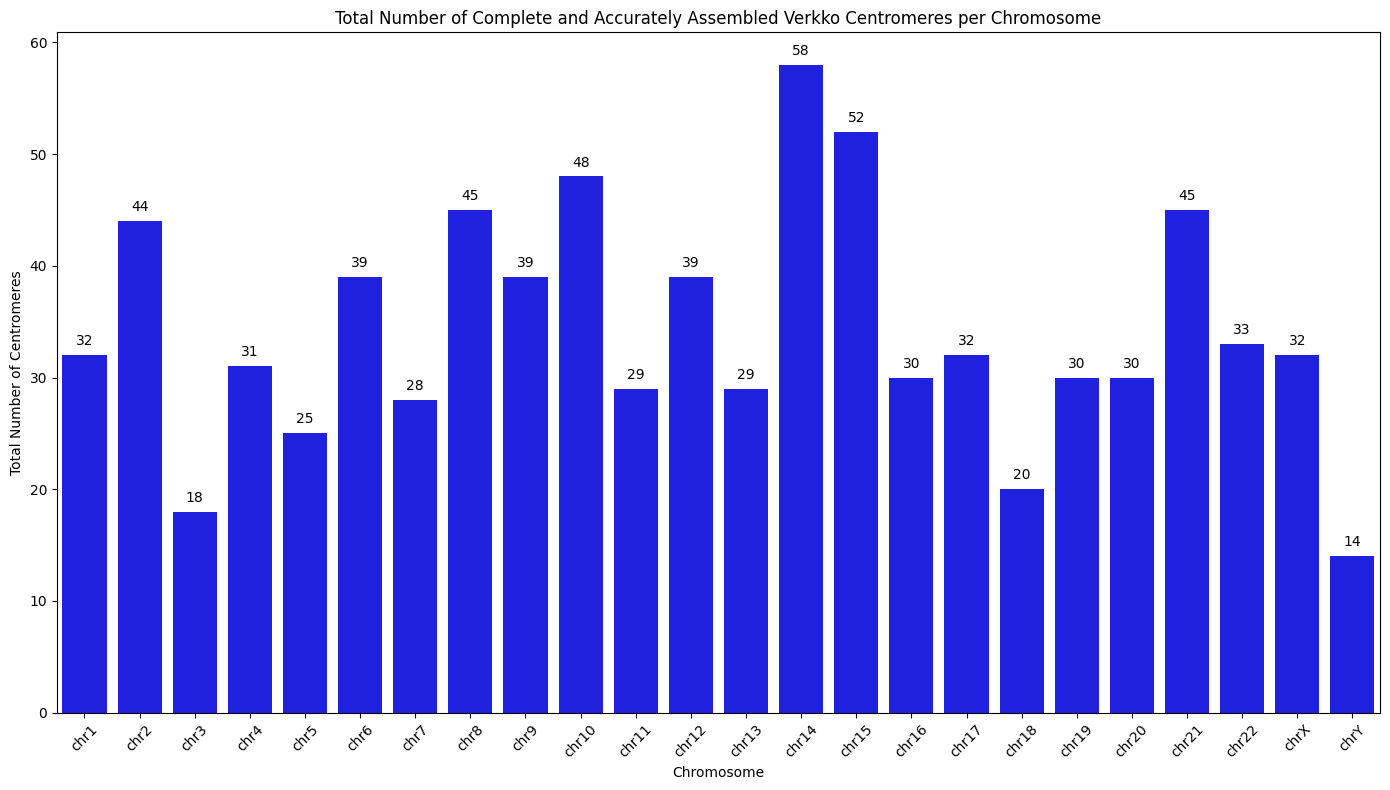

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the BED file into a DataFrame
bed_file = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123/hgsvc3_verkko_v1.4_nonredundant_complete_and_accurate_centromeric_regions_v3.bed"
columns = ['Haplotype', 'Start', 'End', 'Sample', 'Chromosome']
df = pd.read_csv(bed_file, sep='\t', header=None, names=columns)

# Count the total number of centromeres per chromosome
centromere_counts = df.groupby('Chromosome').size().reset_index(name='Total Centromeres')

# Define the order of chromosomes for plotting
chromosome_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']
centromere_counts['Chromosome'] = pd.Categorical(centromere_counts['Chromosome'], categories=chromosome_order, ordered=True)

# Sort the DataFrame by chromosome order
centromere_counts = centromere_counts.sort_values('Chromosome')

# Print the total number of centromeres per chromosome
print("Total number of centromeres per chromosome:")
print(centromere_counts)

# Calculate and print the total number of centromeres across all chromosomes
total_centromeres = centromere_counts['Total Centromeres'].sum()
print(f"\nTotal number of centromeres across all chromosomes: {total_centromeres}")

# Plotting the total number of centromeres per chromosome
plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=centromere_counts, x='Chromosome', y='Total Centromeres', color='blue')

# Adding the counts on top of the bars, slightly above each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10), textcoords = 'offset points')

plt.title('Total Number of Complete and Accurately Assembled Verkko Centromeres per Chromosome')
plt.xlabel('Chromosome')
plt.ylabel('Total Number of Centromeres')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

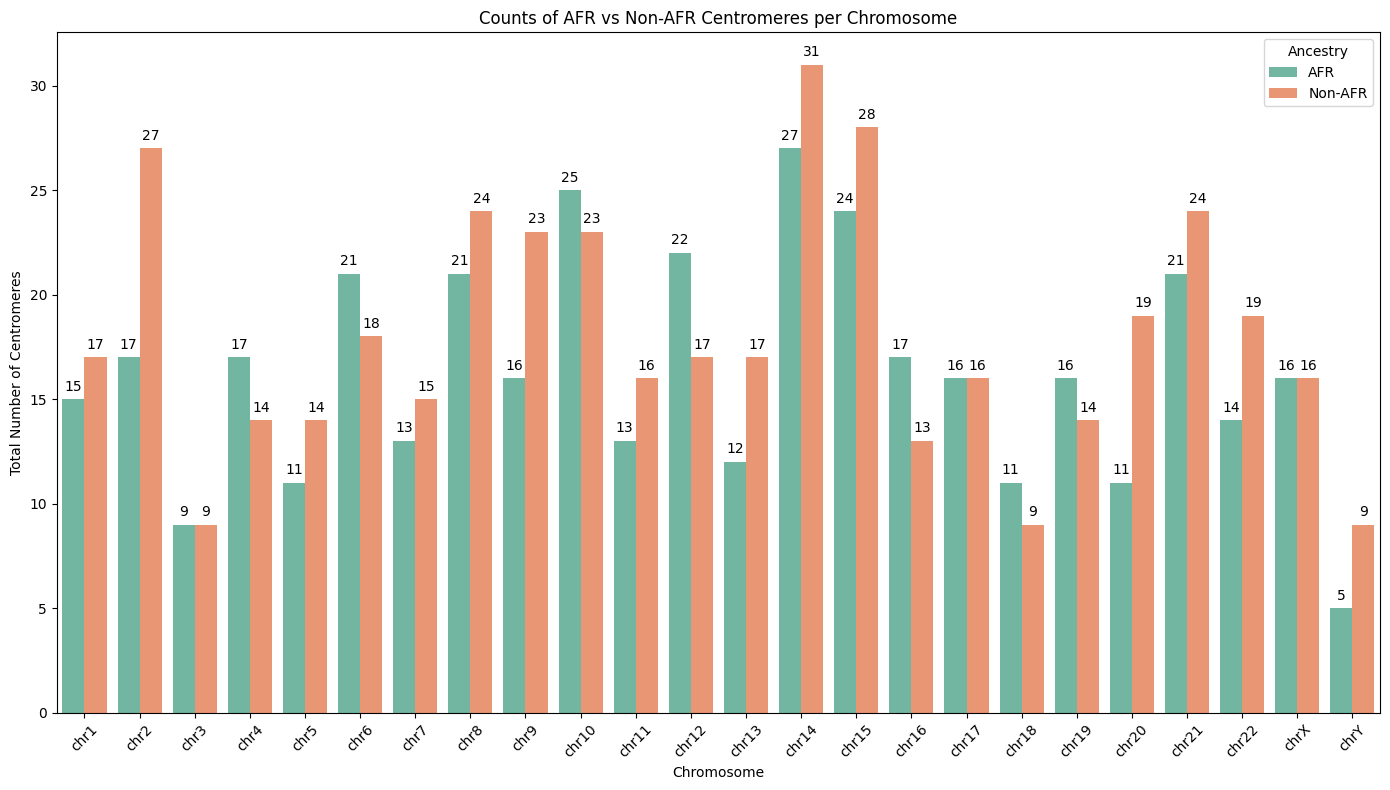

Total number of centromeres across all chromosomes: 822


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the BED file into a DataFrame
bed_file = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123/hgsvc3_verkko_v1.4_nonredundant_complete_and_accurate_centromeric_regions_v3.bed"
columns = ['Haplotype', 'Start', 'End', 'Sample', 'Chromosome']
df = pd.read_csv(bed_file, sep='\t', header=None, names=columns)

# Load metadata
metadata_path = "/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv"
metadata_df = pd.read_csv(metadata_path, delimiter='\t')

# Merge metadata with the BED file data
df = pd.merge(df, metadata_df[['Sample name', 'Superpopulation name']], left_on='Sample', right_on='Sample name', how='left')

# Categorize into African Ancestry vs Non-African Ancestry
df['Ancestry'] = df['Superpopulation name'].apply(lambda x: 'AFR' if x == 'African Ancestry' else 'Non-AFR')

# Group the data by Chromosome and Ancestry to count the total centromeres
centromere_counts = df.groupby(['Chromosome', 'Ancestry']).size().reset_index(name='Total Centromeres')

# Calculate total number of centromeres across all chromosomes
total_centromeres = centromere_counts['Total Centromeres'].sum()

# Convert the order of chromosomes to categorical for proper ordering
chromosome_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']
centromere_counts['Chromosome'] = pd.Categorical(centromere_counts['Chromosome'], categories=chromosome_order, ordered=True)

# Plotting the grouped bar plot for AFR vs Non-AFR centromere counts by chromosome
plt.figure(figsize=(14, 8))
sns.barplot(x='Chromosome', y='Total Centromeres', hue='Ancestry', data=centromere_counts, palette='Set2')

# Add labels above the bars, but only for non-zero counts
for p in plt.gca().patches:
    if p.get_height() > 0:
        plt.gca().annotate(format(p.get_height(), '.0f'),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center',
                           xytext=(0, 9), textcoords='offset points')

plt.title('Counts of AFR vs Non-AFR Centromeres per Chromosome')
plt.xlabel('Chromosome')
plt.ylabel('Total Number of Centromeres')
plt.xticks(rotation=45)
plt.legend(title='Ancestry')
plt.tight_layout()

# Show the plot
plt.show()

# Print the total number of centromeres across all chromosomes
print(f"Total number of centromeres across all chromosomes: {total_centromeres}")

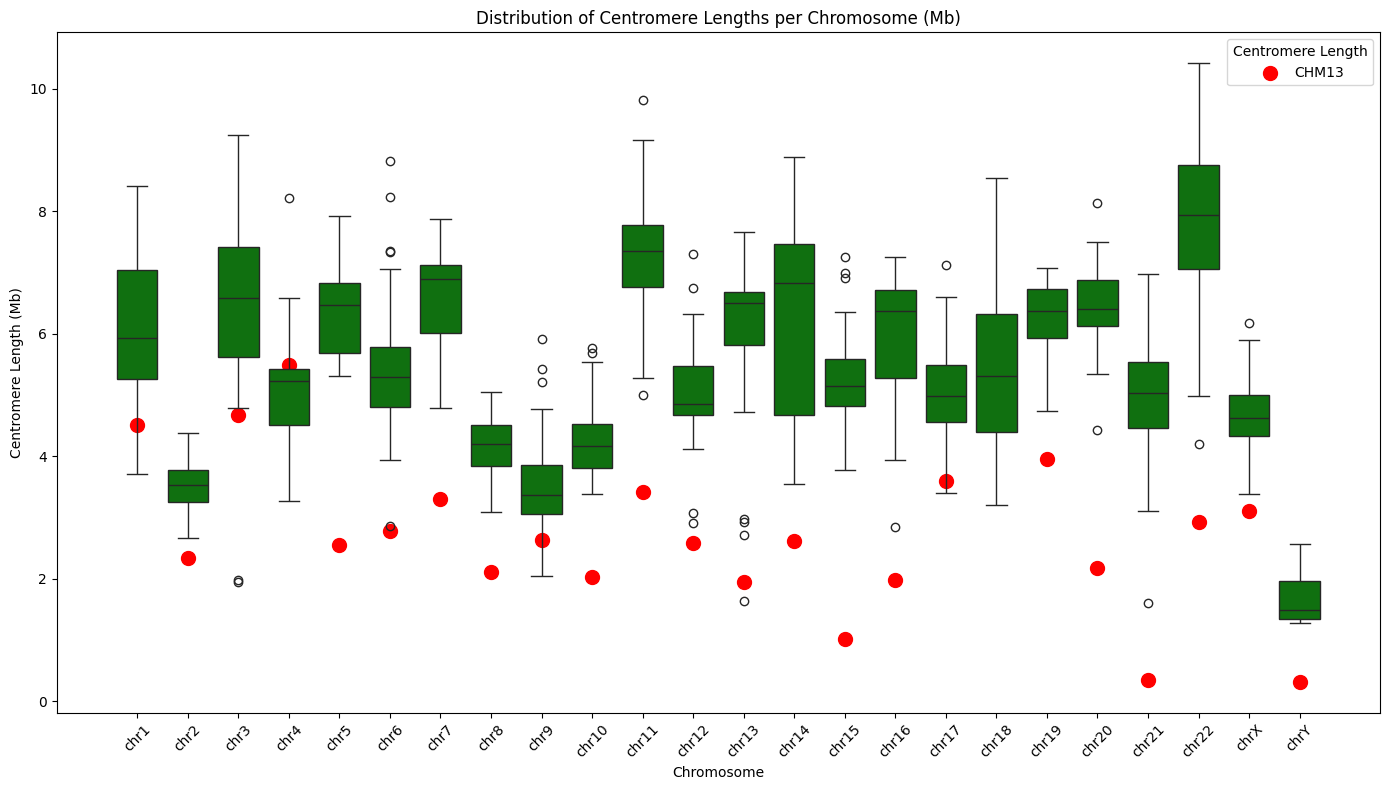

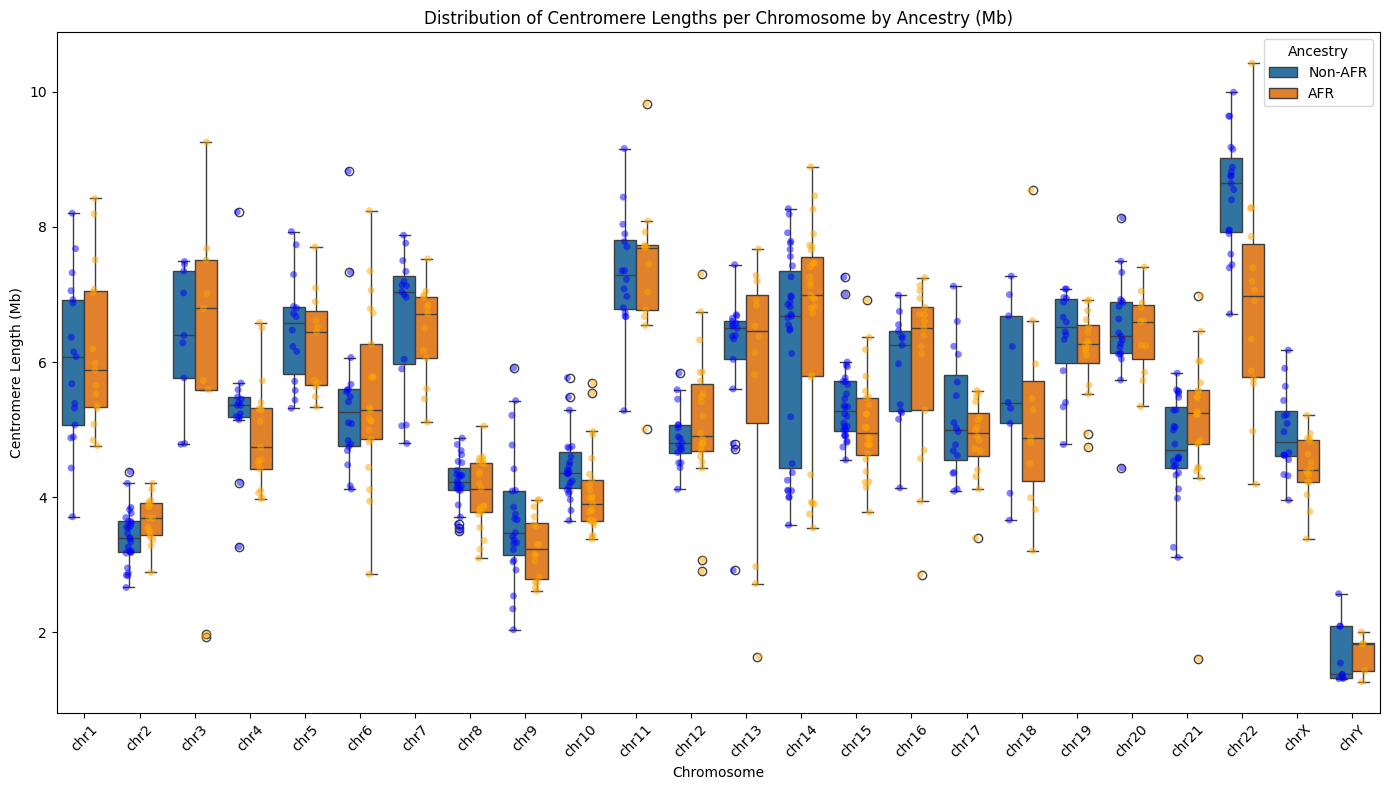

Total number of centromeres: 822

Number of centromeres by ancestry:
Ancestry
Non-AFR    432
AFR        390
Name: count, dtype: int64

Summary statistics for centromere lengths:
   Chromosome      mean    median         sum  count
0        chr1  6.088825  5.933343  194.842402     32
1        chr2  3.510657  3.534549  154.468927     44
2        chr3  6.155626  6.593149  110.801259     18
3        chr4  5.126667  5.233948  158.926685     31
4        chr5  6.400828  6.472248  160.020688     25
5        chr6  5.471374  5.288297  213.383594     39
6        chr7  6.556857  6.900913  183.591989     28
7        chr8  4.149677  4.206798  186.735448     45
8        chr9  3.516330  3.371670  137.136859     39
9       chr10  4.258177  4.164606  204.392489     48
10      chr11  7.354879  7.351672  213.291501     29
11      chr12  5.015218  4.860365  195.593518     39
12      chr13  5.914084  6.499596  171.508430     29
13      chr14  6.359172  6.834013  368.831955     58
14      chr15  5.250264  5.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the BED file into a DataFrame
bed_file = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123/hgsvc3_verkko_v1.4_nonredundant_complete_and_accurate_centromeric_regions_v3.bed"
columns = ['Haplotype', 'Start', 'End', 'Sample', 'Chromosome']
df = pd.read_csv(bed_file, sep='\t', header=None, names=columns)

# Load the metadata to categorize samples into AFR vs Non-AFR
metadata_path = '/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv'
metadata_df = pd.read_csv(metadata_path, delimiter='\t')

# Merge metadata with the BED file data
df = pd.merge(df, metadata_df[['Sample name', 'Superpopulation name']], left_on='Sample', right_on='Sample name', how='left')

# Categorize into African vs Non-African
df['Ancestry'] = df['Superpopulation name'].apply(lambda x: 'AFR' if x == 'African Ancestry' else 'Non-AFR')

# Calculate the length of each centromere in Mb
df['Centromere_Length'] = (df['End'] - df['Start']) / 1e6  # Convert to megabases (Mb)

# Define the order of chromosomes for plotting
chromosome_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']
df['Chromosome'] = pd.Categorical(df['Chromosome'], categories=chromosome_order, ordered=True)

# CHM13 centromere lengths
centromere_lengths = {
    'chr1': 4.504439,
    'chr2': 2.33948,
    'chr3': 4.677024,
    'chr4': 5.494641,
    'chr5': 2.557491,
    'chr6': 2.771684,
    'chr7': 3.300127,
    'chr8': 2.109248,
    'chr9': 2.63082,
    'chr10': 2.030796,
    'chr11': 3.415049,
    'chr12': 2.581652,
    'chr13': 1.950698,
    'chr14': 2.616299,
    'chr15': 1.015672,
    'chr16': 1.981235,
    'chr17': 3.59452,
    'chr18': 4.967851,
    'chr19': 3.950495,
    'chr20': 2.173803,
    'chr21': 0.343352,
    'chr22': 2.922885,
    'chrX': 3.106918,
    'chrY': 0.317335
}

# Plotting the distribution of centromere lengths per chromosome in Mb using a boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Chromosome', y='Centromere_Length', color='green')

# Add CHM13 lengths as red dots
for chrom, length in centromere_lengths.items():
    plt.scatter(chrom, length, color='red', s=100, label='CHM13' if chrom == 'chr1' else "")

plt.title('Distribution of Centromere Lengths per Chromosome (Mb)')
plt.xlabel('Chromosome')
plt.ylabel('Centromere Length (Mb)')
plt.xticks(rotation=45)
plt.legend(title='Centromere Length')
plt.tight_layout()

# Show the plot
plt.show()

# Plotting the distribution of centromere lengths across all chromosomes with AFR vs Non-AFR comparison
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Chromosome', y='Centromere_Length', hue='Ancestry', order=chromosome_order)
sns.stripplot(data=df, x='Chromosome', y='Centromere_Length', hue='Ancestry', order=chromosome_order, dodge=True, palette=['blue', 'orange'], alpha=0.5, jitter=True, legend=False)
plt.title('Distribution of Centromere Lengths per Chromosome by Ancestry (Mb)')
plt.xlabel('Chromosome')
plt.ylabel('Centromere Length (Mb)')
plt.xticks(rotation=45)
plt.legend(title='Ancestry')
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the total number of centromeres
total_centromeres = df.shape[0]
print(f"Total number of centromeres: {total_centromeres}")

# Calculate and print the number of centromeres by ancestry
centromere_counts_by_ancestry = df['Ancestry'].value_counts()
print("\nNumber of centromeres by ancestry:")
print(centromere_counts_by_ancestry)

# Print summary statistics for centromere lengths
centromere_length_summary = df.groupby('Chromosome', observed=True)['Centromere_Length'].agg(['mean', 'median', 'sum', 'count']).reset_index()
print("\nSummary statistics for centromere lengths:")
print(centromere_length_summary)

# Print Sample names for AFR and Non-AFR
afr_samples = df[df['Ancestry'] == 'AFR']['Sample'].unique()
non_afr_samples = df[df['Ancestry'] == 'Non-AFR']['Sample'].unique()

print("\nAFR Samples:")
print(afr_samples)

print("\nNon-AFR Samples:")
print(non_afr_samples)

Number of points assigned to each box (Total Count):
Chromosome: chr1, Count: 32 points
Chromosome: chr2, Count: 43 points
Chromosome: chr3, Count: 18 points
Chromosome: chr4, Count: 31 points
Chromosome: chr5, Count: 25 points
Chromosome: chr6, Count: 39 points
Chromosome: chr7, Count: 28 points
Chromosome: chr8, Count: 45 points
Chromosome: chr9, Count: 39 points
Chromosome: chr10, Count: 48 points
Chromosome: chr11, Count: 29 points
Chromosome: chr12, Count: 39 points
Chromosome: chr13, Count: 29 points
Chromosome: chr14, Count: 58 points
Chromosome: chr15, Count: 52 points
Chromosome: chr16, Count: 30 points
Chromosome: chr17, Count: 32 points
Chromosome: chr18, Count: 20 points
Chromosome: chr19, Count: 30 points
Chromosome: chr20, Count: 30 points
Chromosome: chr21, Count: 45 points
Chromosome: chr22, Count: 33 points
Chromosome: chrX, Count: 32 points
Chromosome: chrY, Count: 14 points


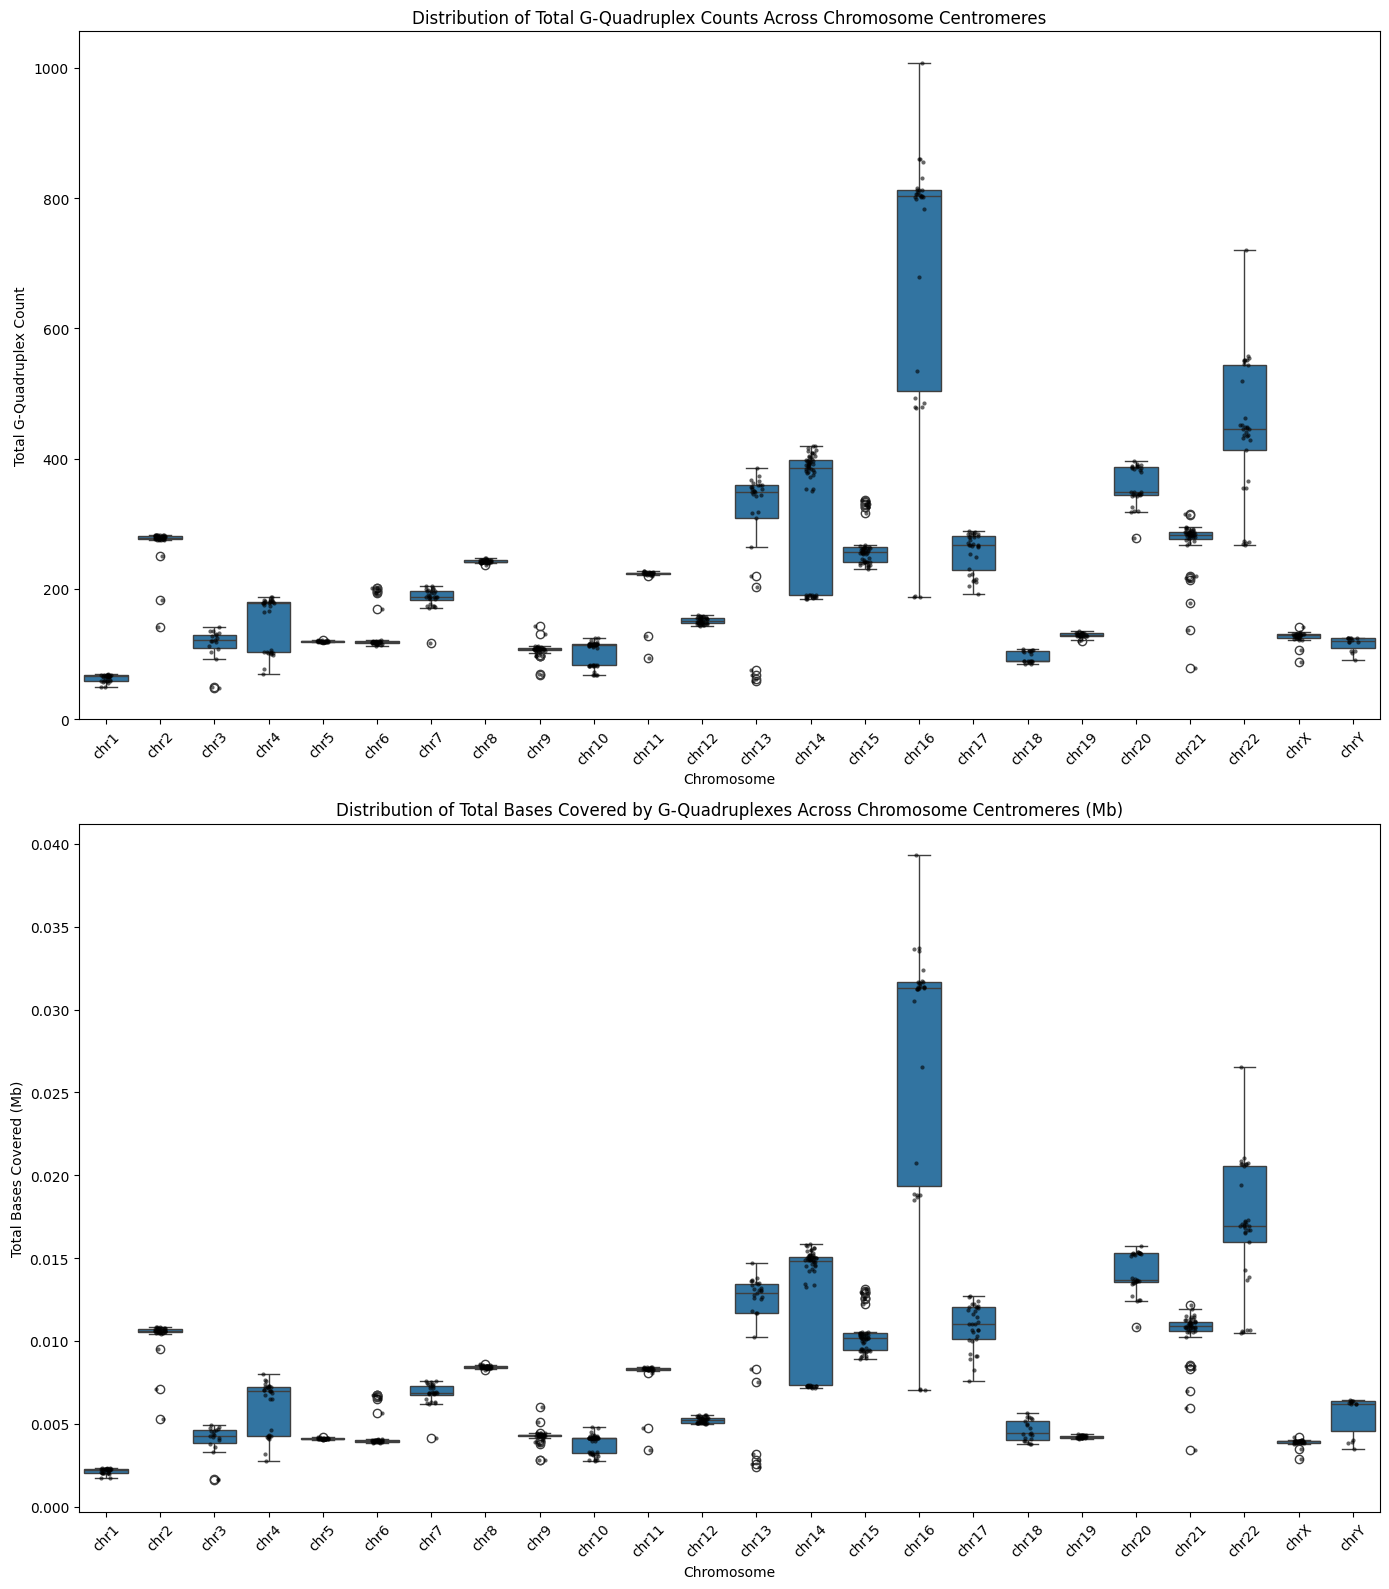

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Hypothetical file paths (assuming they are stored in the same directory)
nonb_files = sorted(glob.glob('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123/verkko123_collapsed_summary_metrics_centromere_chr*.csv'))
quadron_files = sorted(glob.glob('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123/verkko123_quadron_collapsed_summary_metrics_centromeres_chr*.csv'))

# Initialize empty lists to hold data
nonb_data = []
quadron_data = []

# Load data from non-B motif files
for file in nonb_files:
    df = pd.read_csv(file)
    nonb_data.append(df)

# Load data from Quadron files and extract chromosome information from the file names
for file in quadron_files:
    df = pd.read_csv(file)
    chromosome = os.path.basename(file).split('_')[-1].replace('.csv', '')
    df['Chromosome'] = chromosome
    quadron_data.append(df)

# Concatenate data into a single DataFrame for each type
nonb_df = pd.concat(nonb_data, ignore_index=True)
quadron_df = pd.concat(quadron_data, ignore_index=True)

# Combine Positive and Negative G-Quadruplex counts and total bases covered for each sample
g_quad_df = quadron_df[quadron_df['Motif Type'].isin(['Positive_G_Quad', 'Negative_G_Quad'])]
g_quad_df = g_quad_df.groupby(['Sample_Haplotype', 'Chromosome']).agg({
    'Total Count': 'sum',
    'Total Base Coverage': 'sum'
}).reset_index()

# Convert Total Base Coverage from base pairs to megabases (Mb)
g_quad_df['Total Base Coverage'] = g_quad_df['Total Base Coverage'] / 1e6

# Define the order of chromosomes
chromosome_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']

# Convert Chromosome column to a categorical type with a specific order
g_quad_df['Chromosome'] = pd.Categorical(g_quad_df['Chromosome'], categories=chromosome_order, ordered=True)

# Print the number of points assigned to each box
print("Number of points assigned to each box (Total Count):")
for chrom in chromosome_order:
    count = g_quad_df[g_quad_df['Chromosome'] == chrom]['Sample_Haplotype'].nunique()
    if count > 0:
        print(f"Chromosome: {chrom}, Count: {count} points")

# Plotting the combined G-Quadruplex counts
plt.figure(figsize=(14, 16))

plt.subplot(2, 1, 1)
sns.boxplot(data=g_quad_df, x='Chromosome', y='Total Count', order=chromosome_order)
sns.stripplot(data=g_quad_df, x='Chromosome', y='Total Count', dodge=True, order=chromosome_order, size=3, alpha=0.6, color='black', legend=False)
plt.title('Distribution of Total G-Quadruplex Counts Across Chromosome Centromeres')
plt.xlabel('Chromosome')
plt.ylabel('Total G-Quadruplex Count')
plt.xticks(rotation=45)

# Plotting the total bases covered by G-Quadruplexes in Mb
plt.subplot(2, 1, 2)
sns.boxplot(data=g_quad_df, x='Chromosome', y='Total Base Coverage', order=chromosome_order)
sns.stripplot(data=g_quad_df, x='Chromosome', y='Total Base Coverage', dodge=True, order=chromosome_order, size=3, alpha=0.6, color='black', legend=False)
plt.title('Distribution of Total Bases Covered by G-Quadruplexes Across Chromosome Centromeres (Mb)')
plt.xlabel('Chromosome')
plt.ylabel('Total Bases Covered (Mb)')
plt.xticks(rotation=45)

plt.tight_layout()

# Show the plots
plt.show()

Number of unique samples before merging: 821
['NA21487' 'NA24385']
Number of unique samples after merging: 821
Number of unique samples after summing data: 821
Number of samples assigned to each bar:
Chromosome: chr1, Ancestry: AFR, Count: 15 samples
Chromosome: chr1, Ancestry: Non-AFR, Count: 17 samples
Chromosome: chr2, Ancestry: AFR, Count: 17 samples
Chromosome: chr2, Ancestry: Non-AFR, Count: 26 samples
Chromosome: chr3, Ancestry: AFR, Count: 9 samples
Chromosome: chr3, Ancestry: Non-AFR, Count: 9 samples
Chromosome: chr4, Ancestry: AFR, Count: 17 samples
Chromosome: chr4, Ancestry: Non-AFR, Count: 14 samples
Chromosome: chr5, Ancestry: AFR, Count: 11 samples
Chromosome: chr5, Ancestry: Non-AFR, Count: 14 samples
Chromosome: chr6, Ancestry: AFR, Count: 21 samples
Chromosome: chr6, Ancestry: Non-AFR, Count: 18 samples
Chromosome: chr7, Ancestry: AFR, Count: 13 samples
Chromosome: chr7, Ancestry: Non-AFR, Count: 15 samples
Chromosome: chr8, Ancestry: AFR, Count: 21 samples
Chromosom

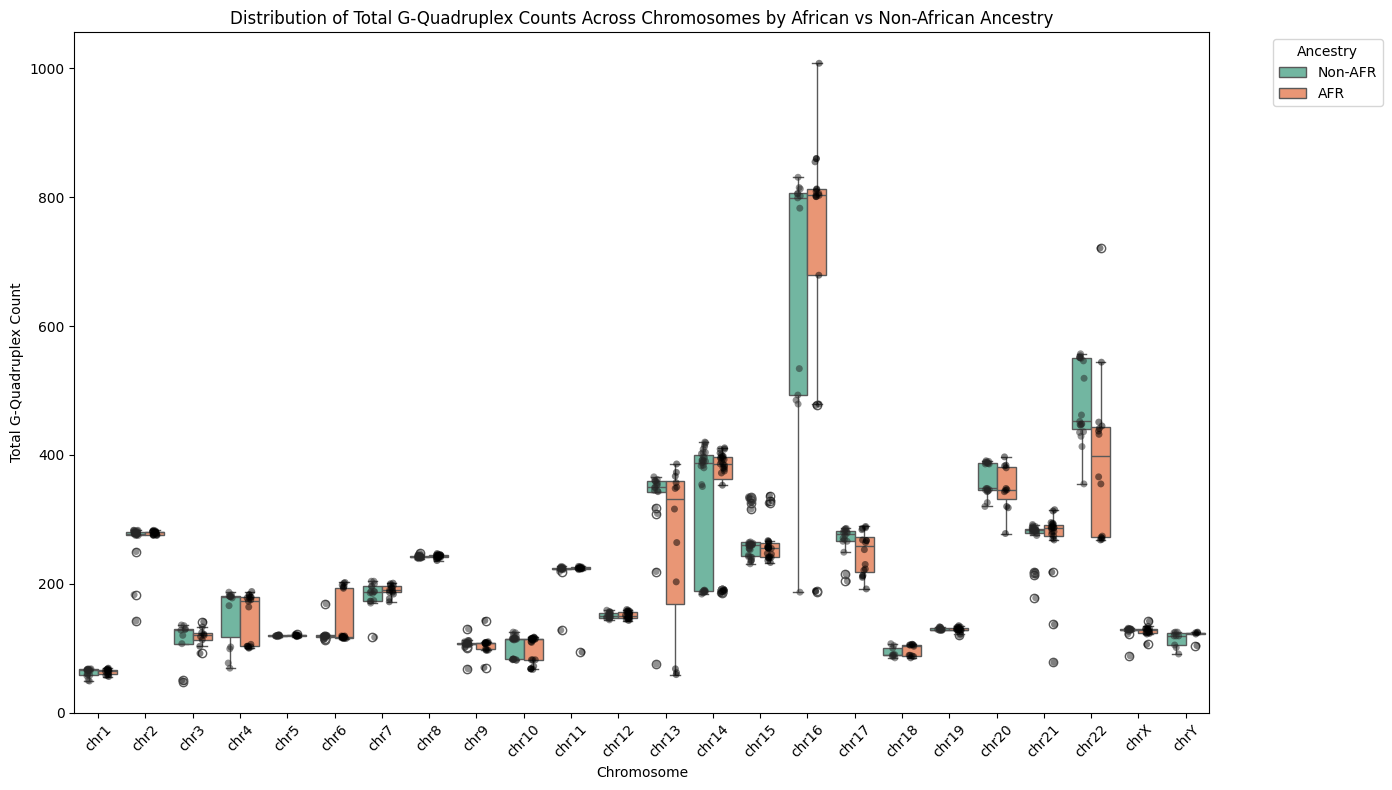

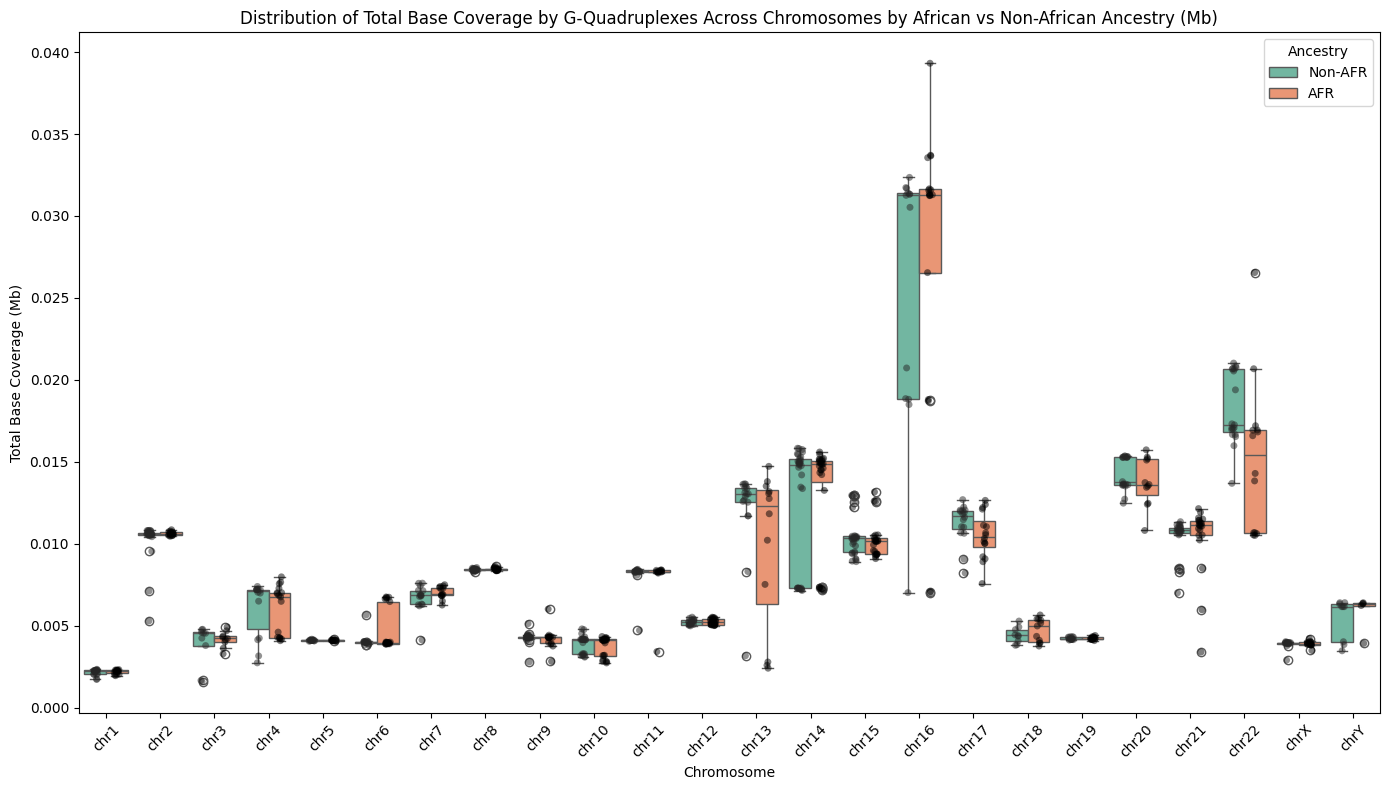

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Paths
base_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123/'
metadata_path = '/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv'  # Update this with the actual path to your metadata file
chromosome_files = sorted(glob.glob(base_path + 'verkko123_quadron_collapsed_summary_metrics_centromeres_chr*.csv'))

# Load metadata
metadata_df = pd.read_csv(metadata_path, delimiter='\t')

# Standardize the case and strip whitespace in the metadata's Sample name
metadata_df['Sample name'] = metadata_df['Sample name'].str.upper().str.strip()

# Load data from Quadron files and extract chromosome information from the file names
quadron_data = []
for file in chromosome_files:
    df = pd.read_csv(file)
    chromosome = os.path.basename(file).split('_')[-1].replace('.csv', '')
    df['Chromosome'] = chromosome
    df['Sample'] = df['Sample_Haplotype'].str.extract(r'(HG\d{5}|NA\d{5})')[0].str.upper().str.strip()
    quadron_data.append(df[['Sample_Haplotype', 'Sample', 'Motif Type', 'Total Count', 'Total Base Coverage', 'Chromosome']])

# Concatenate data into a single DataFrame
quadron_df = pd.concat(quadron_data, ignore_index=True)

# Check the number of unique samples before merging with metadata
print(f"Number of unique samples before merging: {quadron_df['Sample_Haplotype'].nunique()}")

# Filter for G-Quadruplexes only and combine positive and negative counts and coverage
g_quad_df = quadron_df[quadron_df['Motif Type'].isin(['Positive_G_Quad', 'Negative_G_Quad'])]
g_quad_df = g_quad_df.groupby(['Sample_Haplotype', 'Sample', 'Chromosome']).agg({
    'Total Count': 'sum',
    'Total Base Coverage': 'sum'
}).reset_index()

# Convert Total Base Coverage from base pairs to megabases (Mb)
g_quad_df['Total Base Coverage'] = g_quad_df['Total Base Coverage'] / 1e6

# Merge metadata with the data
merged_data = pd.merge(g_quad_df, metadata_df[['Sample name', 'Superpopulation name']], left_on='Sample', right_on='Sample name', how='left')

# Identify samples that were not matched
unmatched_samples = merged_data[merged_data['Superpopulation name'].isnull()]
if not unmatched_samples.empty:
    print("Warning: The following samples were not matched with metadata:")
    print(unmatched_samples['Sample'].unique())

# Check the number of unique samples after merging
print(f"Number of unique samples after merging: {merged_data['Sample_Haplotype'].nunique()}")

# Categorize into African Ancestry vs Non-African Ancestry
merged_data['Ancestry'] = merged_data['Superpopulation name'].apply(lambda x: 'AFR' if x == 'African Ancestry' else 'Non-AFR')

# Sum the total counts and base coverage for each haplotype, chromosome, and ancestry
summed_data = merged_data.groupby(['Sample_Haplotype', 'Ancestry', 'Chromosome']).agg({
    'Total Count': 'sum',
    'Total Base Coverage': 'sum'
}).reset_index()

# Check the number of unique samples after summing data
print(f"Number of unique samples after summing data: {summed_data['Sample_Haplotype'].nunique()}")

# Convert the order of chromosomes to categorical for proper ordering
chromosome_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']
summed_data['Chromosome'] = pd.Categorical(summed_data['Chromosome'], categories=chromosome_order, ordered=True)

# Print the number of samples assigned to each bar and the number of points assigned to each box
print("Number of samples assigned to each bar:")
for chrom in chromosome_order:
    for ancestry in ['AFR', 'Non-AFR']:
        sub_df = summed_data[(summed_data['Chromosome'] == chrom) & (summed_data['Ancestry'] == ancestry)]
        count = sub_df['Sample_Haplotype'].nunique()
        if count > 0:
            print(f"Chromosome: {chrom}, Ancestry: {ancestry}, Count: {count} samples")

# Plotting the distributions for African Ancestry vs Non-African Ancestry for Total Count
plt.figure(figsize=(14, 8))
sns.boxplot(x='Chromosome', y='Total Count', hue='Ancestry', data=summed_data, palette='Set2', dodge=True)
sns.stripplot(x='Chromosome', y='Total Count', hue='Ancestry', data=summed_data, palette='dark:black', jitter=True, alpha=0.5, dodge=True, legend=False)

# Remove duplicate entries in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Ancestry', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Total G-Quadruplex Counts Across Chromosomes by African vs Non-African Ancestry')
plt.xlabel('Chromosome')
plt.ylabel('Total G-Quadruplex Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the distributions for African Ancestry vs Non-African Ancestry for Total Base Coverage in Mb
plt.figure(figsize=(14, 8))
sns.boxplot(x='Chromosome', y='Total Base Coverage', hue='Ancestry', data=summed_data, palette='Set2', dodge=True)
sns.stripplot(x='Chromosome', y='Total Base Coverage', hue='Ancestry', data=summed_data, palette='dark:black', jitter=True, alpha=0.5, dodge=True, legend=False)

plt.title('Distribution of Total Base Coverage by G-Quadruplexes Across Chromosomes by African vs Non-African Ancestry (Mb)')
plt.xlabel('Chromosome')
plt.ylabel('Total Base Coverage (Mb)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Number of points assigned to each box for Total Count (IR):
Chromosome: chr1, Points: 32
Chromosome: chr2, Points: 43
Chromosome: chr3, Points: 18
Chromosome: chr4, Points: 31
Chromosome: chr5, Points: 25
Chromosome: chr6, Points: 39
Chromosome: chr7, Points: 28
Chromosome: chr8, Points: 45
Chromosome: chr9, Points: 39
Chromosome: chr10, Points: 48
Chromosome: chr11, Points: 29
Chromosome: chr12, Points: 39
Chromosome: chr13, Points: 29
Chromosome: chr14, Points: 58
Chromosome: chr15, Points: 52
Chromosome: chr16, Points: 30
Chromosome: chr17, Points: 32
Chromosome: chr18, Points: 20
Chromosome: chr19, Points: 30
Chromosome: chr20, Points: 30
Chromosome: chr21, Points: 45
Chromosome: chr22, Points: 33
Chromosome: chrX, Points: 32
Chromosome: chrY, Points: 14

Number of points assigned to each box for Total Bases Covered (IR):
Chromosome: chr1, Points: 32
Chromosome: chr2, Points: 43
Chromosome: chr3, Points: 18
Chromosome: chr4, Points: 31
Chromosome: chr5, Points: 25
Chromosome: chr6

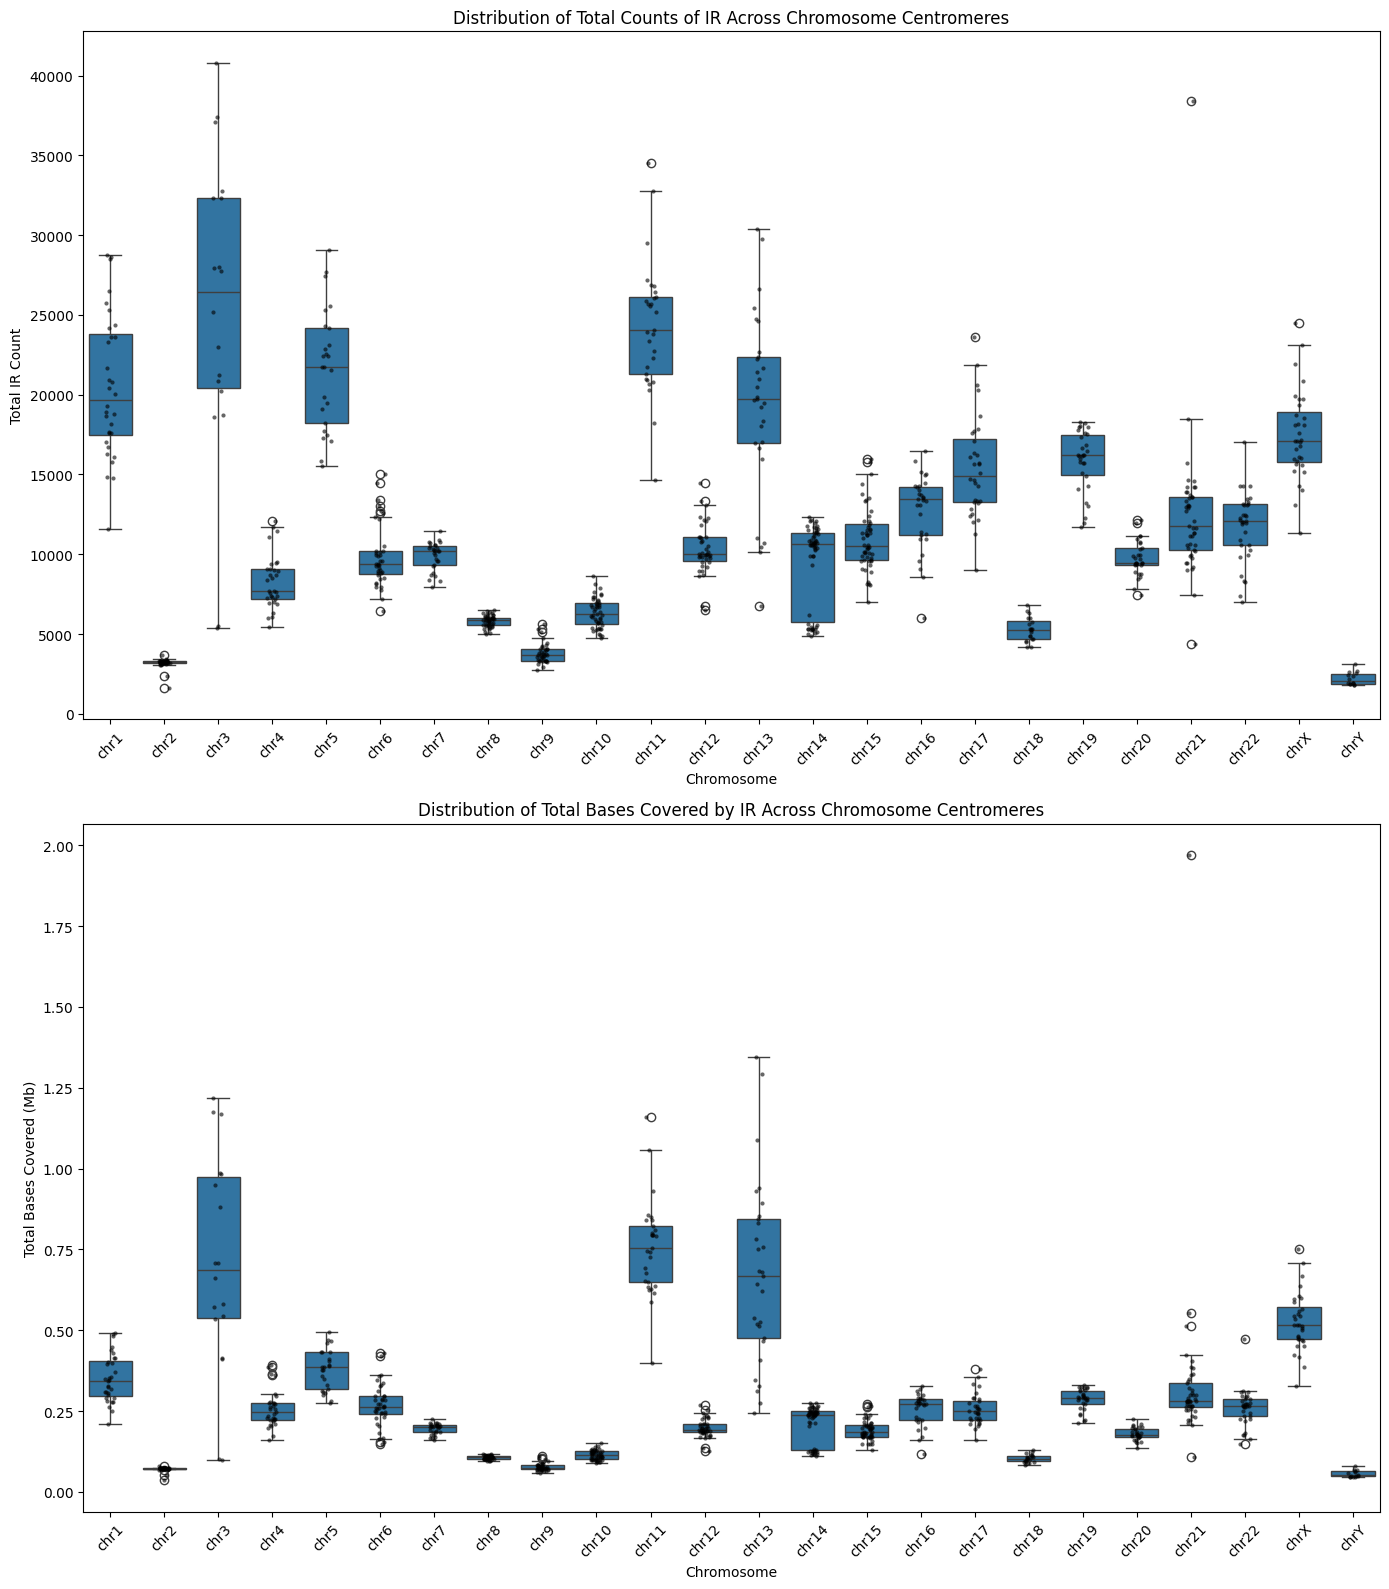


Number of points assigned to each box for Total Count (Z):
Chromosome: chr1, Points: 32
Chromosome: chr2, Points: 43
Chromosome: chr3, Points: 18
Chromosome: chr4, Points: 31
Chromosome: chr5, Points: 25
Chromosome: chr6, Points: 39
Chromosome: chr7, Points: 28
Chromosome: chr8, Points: 45
Chromosome: chr9, Points: 39
Chromosome: chr10, Points: 48
Chromosome: chr11, Points: 29
Chromosome: chr12, Points: 39
Chromosome: chr13, Points: 29
Chromosome: chr14, Points: 58
Chromosome: chr15, Points: 52
Chromosome: chr16, Points: 30
Chromosome: chr17, Points: 32
Chromosome: chr18, Points: 20
Chromosome: chr19, Points: 30
Chromosome: chr20, Points: 30
Chromosome: chr21, Points: 45
Chromosome: chr22, Points: 33
Chromosome: chrX, Points: 32
Chromosome: chrY, Points: 14

Number of points assigned to each box for Total Bases Covered (Z):
Chromosome: chr1, Points: 32
Chromosome: chr2, Points: 43
Chromosome: chr3, Points: 18
Chromosome: chr4, Points: 31
Chromosome: chr5, Points: 25
Chromosome: chr6, 

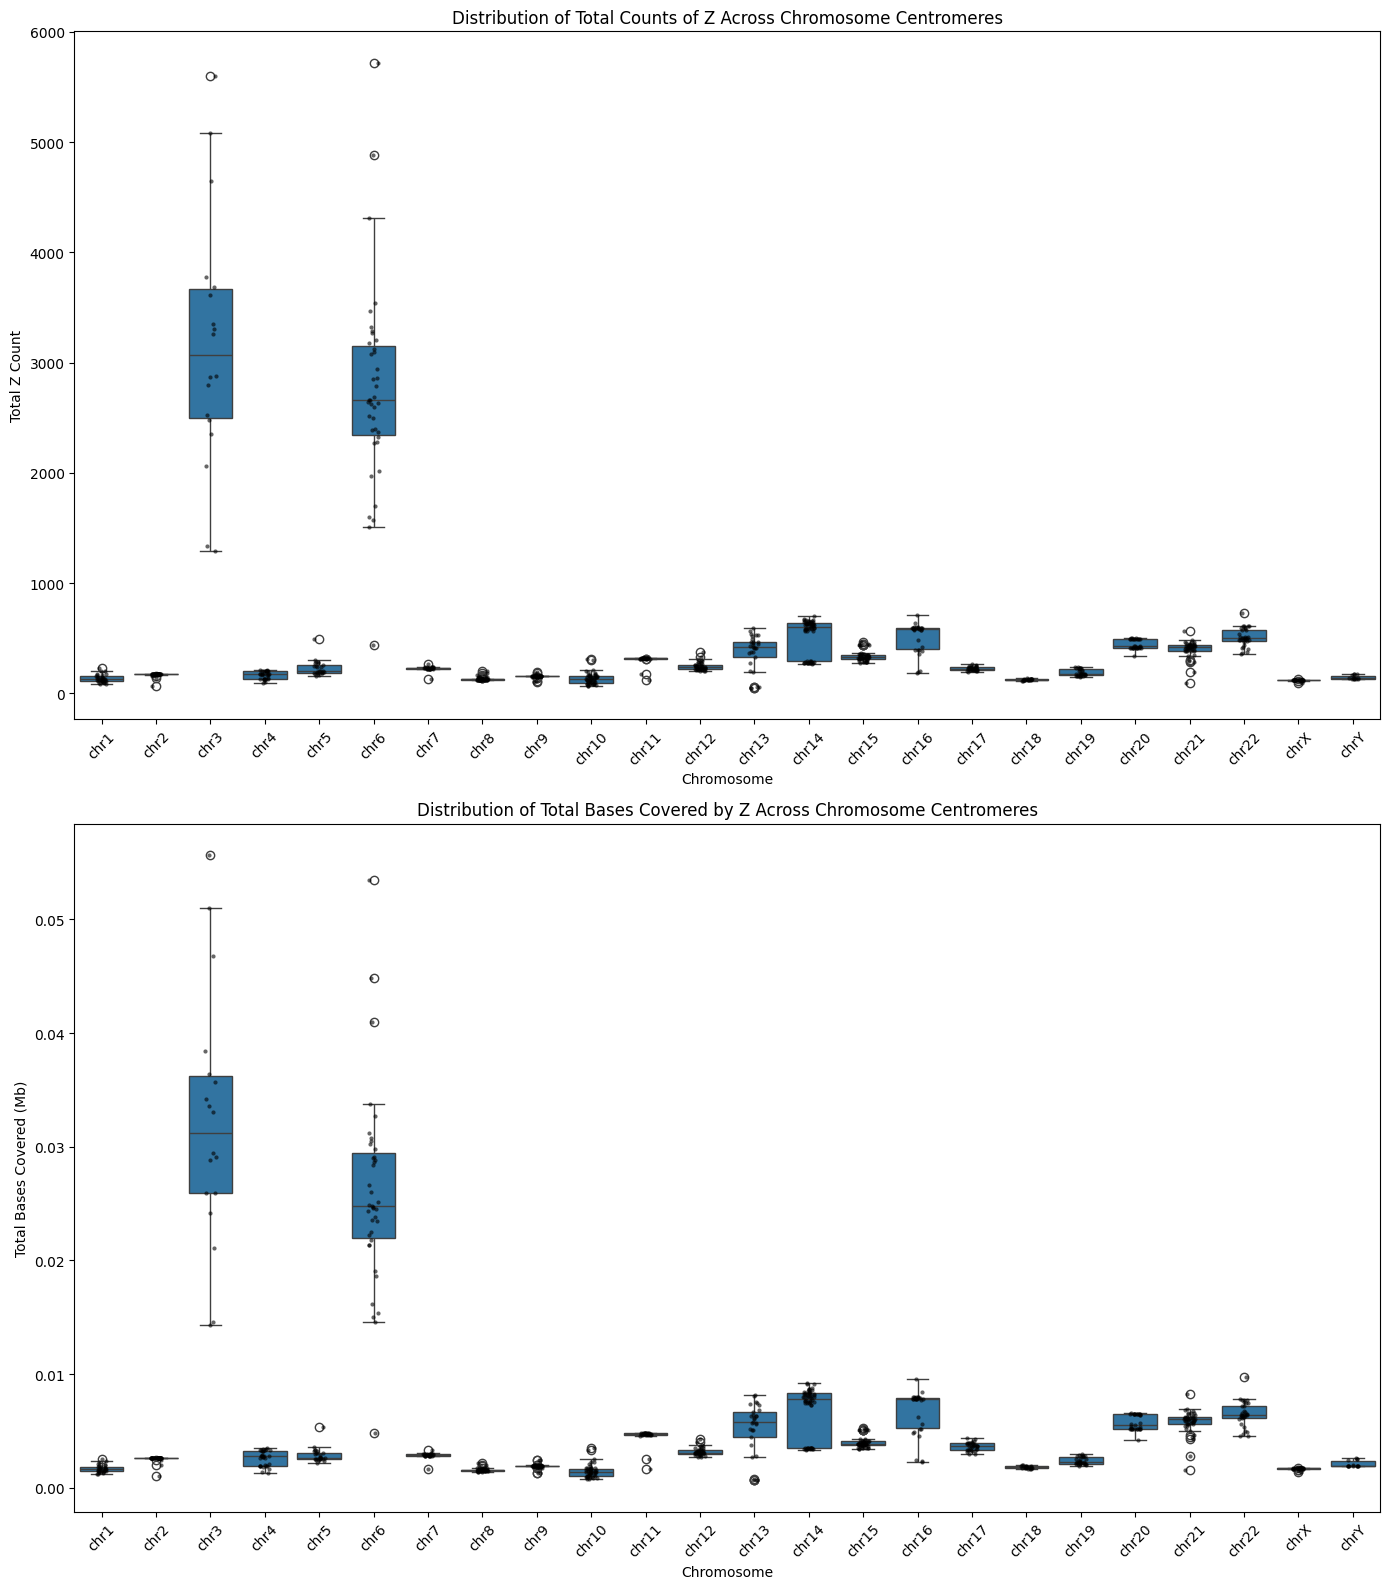


Number of points assigned to each box for Total Count (APR):
Chromosome: chr1, Points: 32
Chromosome: chr2, Points: 43
Chromosome: chr3, Points: 18
Chromosome: chr4, Points: 31
Chromosome: chr5, Points: 25
Chromosome: chr6, Points: 39
Chromosome: chr7, Points: 28
Chromosome: chr8, Points: 45
Chromosome: chr9, Points: 39
Chromosome: chr10, Points: 48
Chromosome: chr11, Points: 29
Chromosome: chr12, Points: 39
Chromosome: chr13, Points: 29
Chromosome: chr14, Points: 58
Chromosome: chr15, Points: 52
Chromosome: chr16, Points: 30
Chromosome: chr17, Points: 32
Chromosome: chr18, Points: 20
Chromosome: chr19, Points: 30
Chromosome: chr20, Points: 30
Chromosome: chr21, Points: 45
Chromosome: chr22, Points: 33
Chromosome: chrX, Points: 32
Chromosome: chrY, Points: 14

Number of points assigned to each box for Total Bases Covered (APR):
Chromosome: chr1, Points: 32
Chromosome: chr2, Points: 43
Chromosome: chr3, Points: 18
Chromosome: chr4, Points: 31
Chromosome: chr5, Points: 25
Chromosome: ch

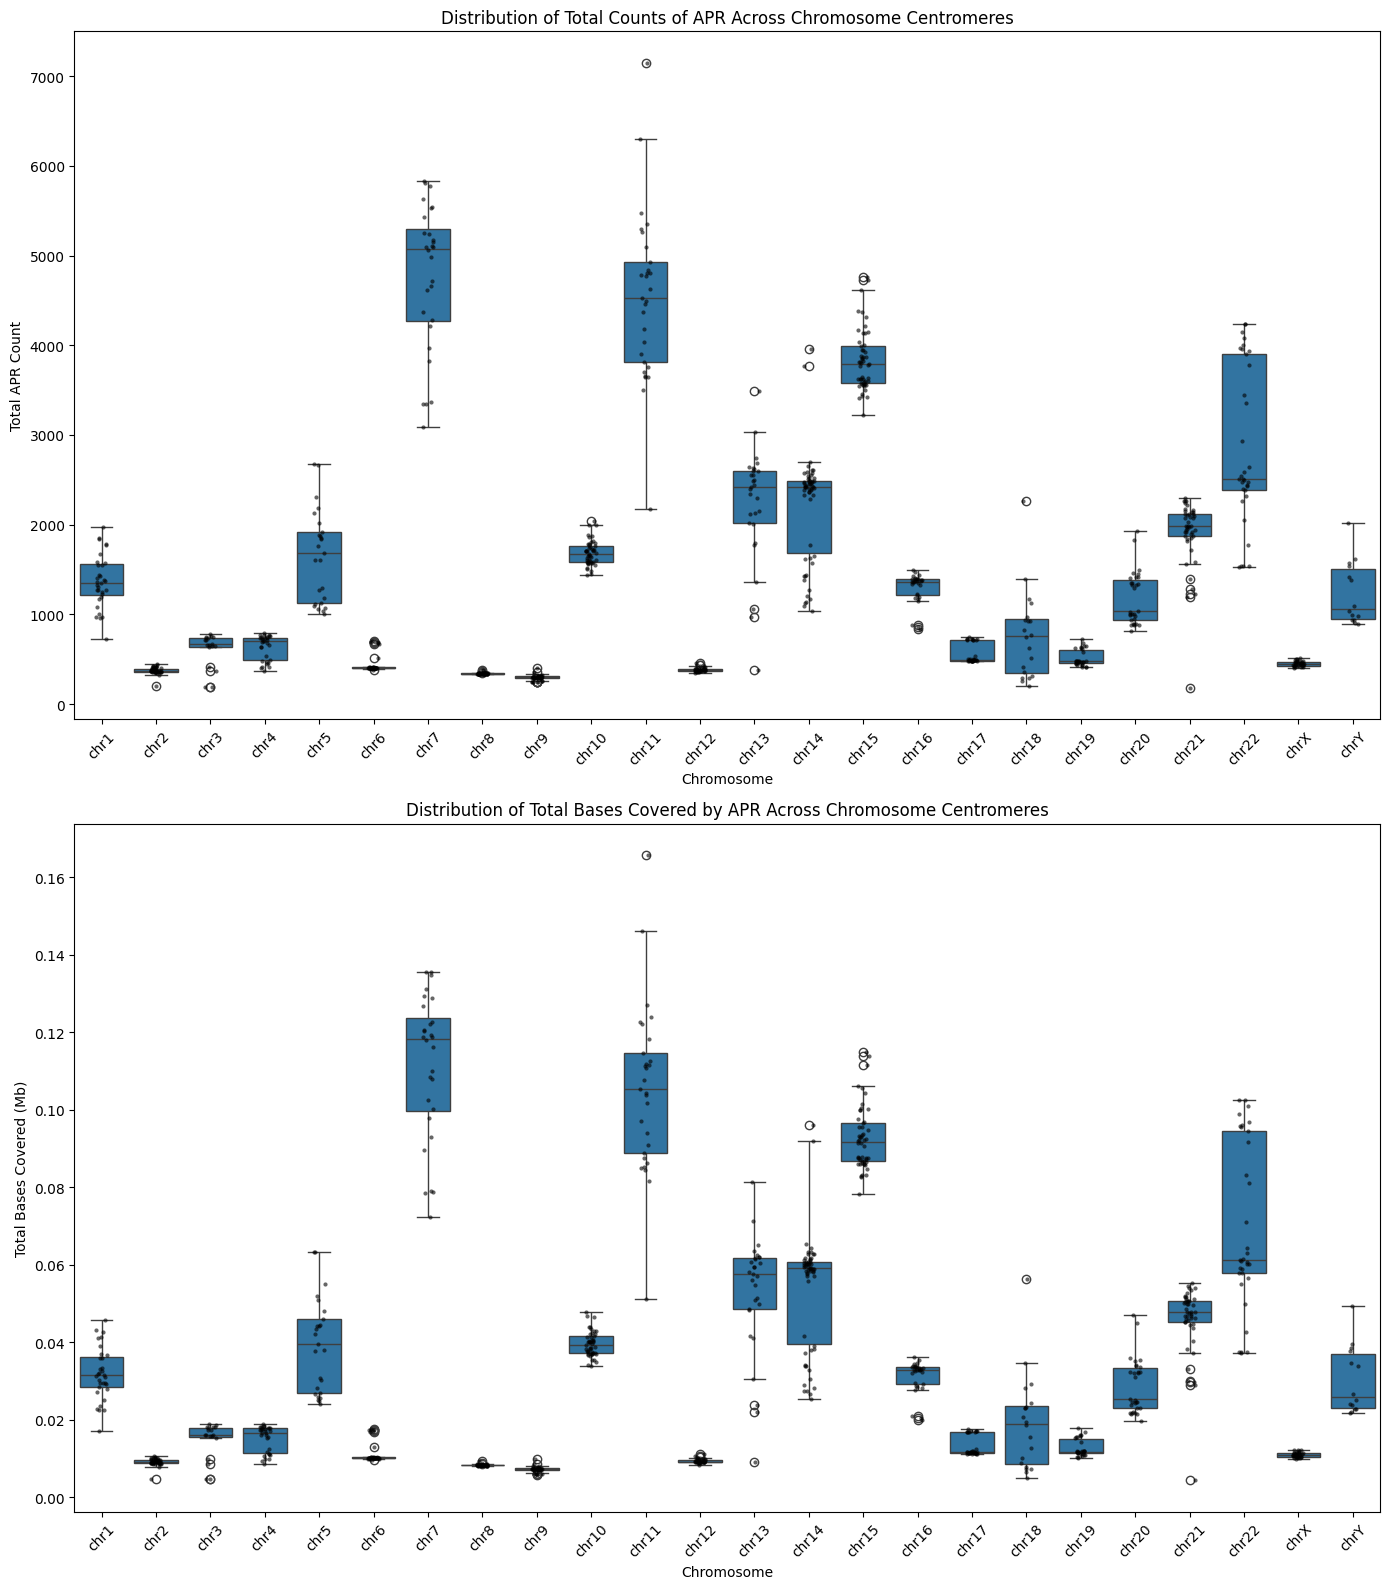


Number of points assigned to each box for Total Count (MR):
Chromosome: chr1, Points: 32
Chromosome: chr2, Points: 43
Chromosome: chr3, Points: 18
Chromosome: chr4, Points: 31
Chromosome: chr5, Points: 25
Chromosome: chr6, Points: 39
Chromosome: chr7, Points: 28
Chromosome: chr8, Points: 45
Chromosome: chr9, Points: 39
Chromosome: chr10, Points: 48
Chromosome: chr11, Points: 29
Chromosome: chr12, Points: 39
Chromosome: chr13, Points: 29
Chromosome: chr14, Points: 58
Chromosome: chr15, Points: 52
Chromosome: chr16, Points: 30
Chromosome: chr17, Points: 32
Chromosome: chr18, Points: 20
Chromosome: chr19, Points: 30
Chromosome: chr20, Points: 30
Chromosome: chr21, Points: 45
Chromosome: chr22, Points: 33
Chromosome: chrX, Points: 32
Chromosome: chrY, Points: 14

Number of points assigned to each box for Total Bases Covered (MR):
Chromosome: chr1, Points: 32
Chromosome: chr2, Points: 43
Chromosome: chr3, Points: 18
Chromosome: chr4, Points: 31
Chromosome: chr5, Points: 25
Chromosome: chr6

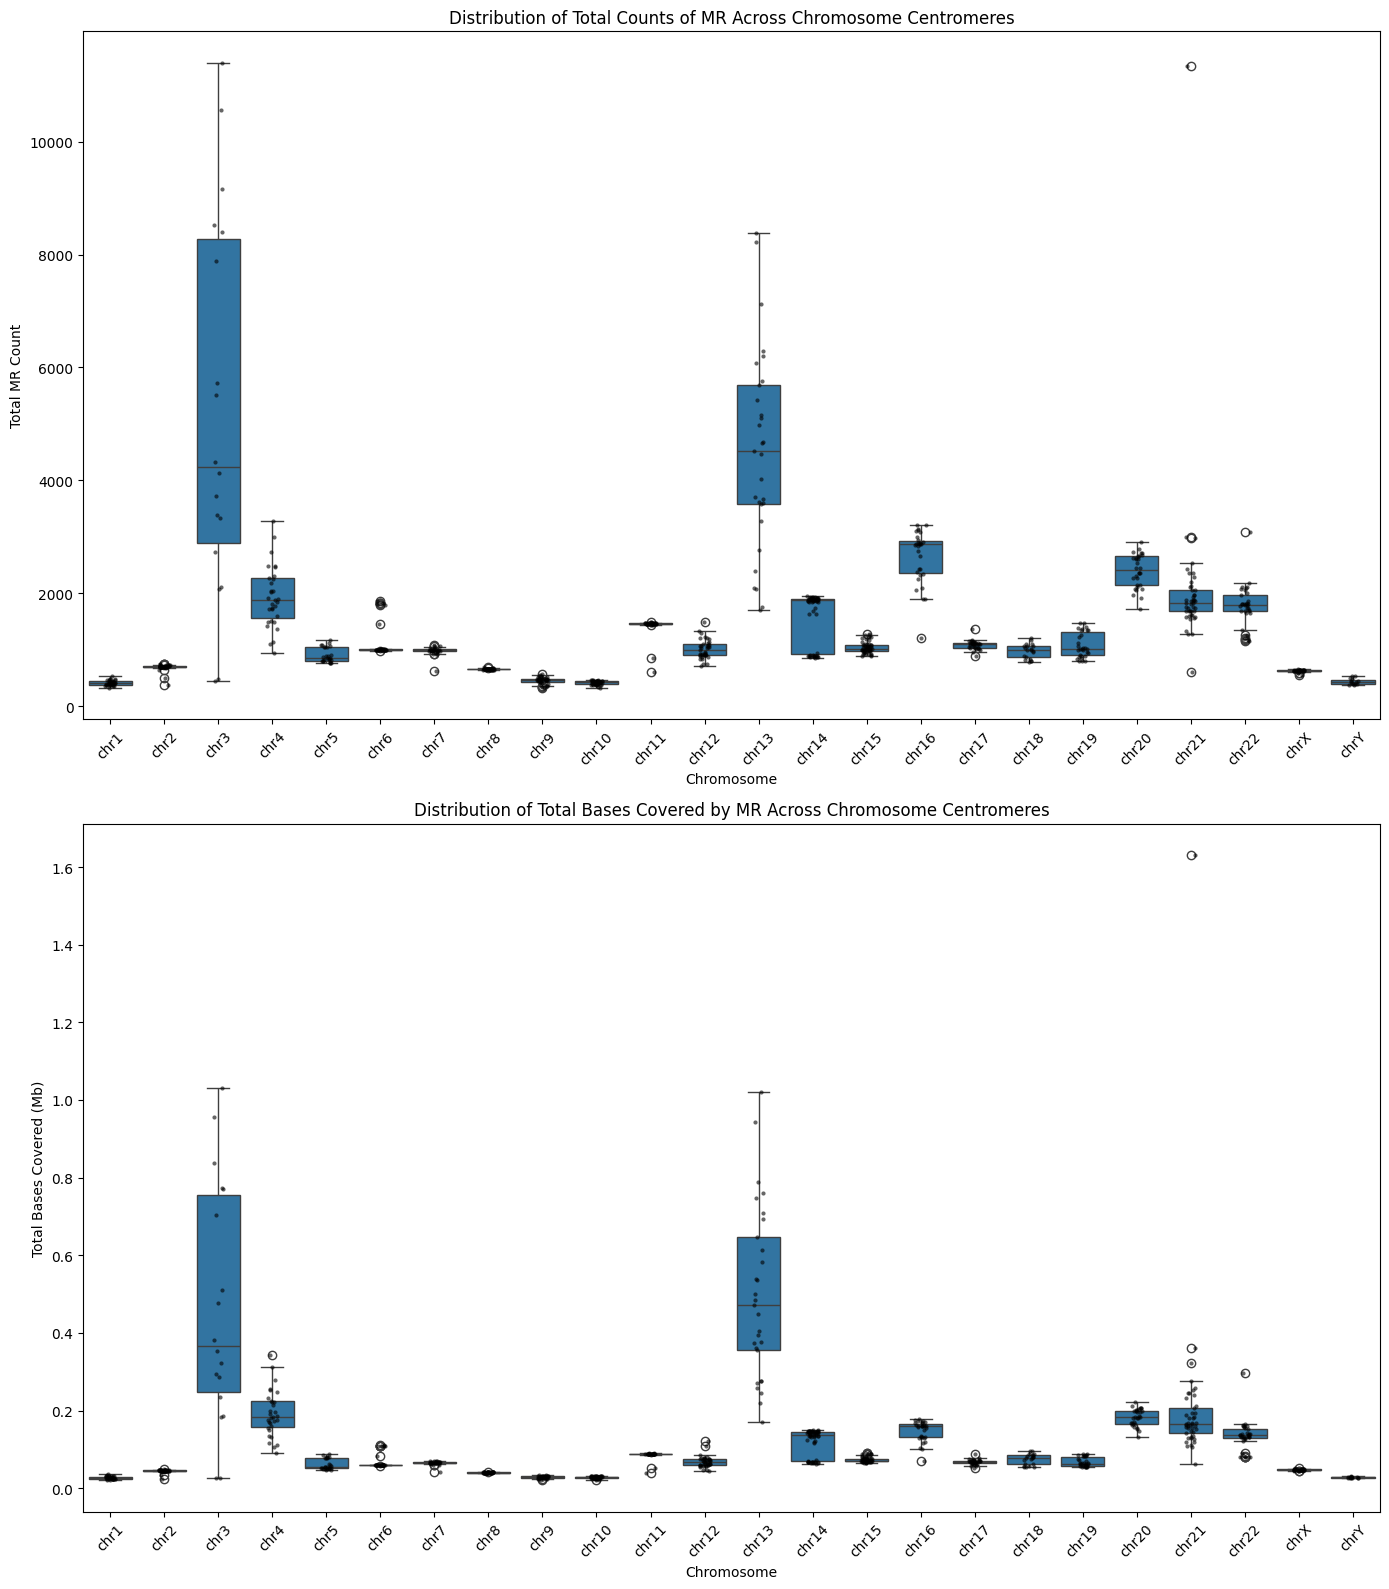


Number of points assigned to each box for Total Count (DR):
Chromosome: chr1, Points: 32
Chromosome: chr2, Points: 43
Chromosome: chr3, Points: 18
Chromosome: chr4, Points: 31
Chromosome: chr5, Points: 25
Chromosome: chr6, Points: 39
Chromosome: chr7, Points: 28
Chromosome: chr8, Points: 45
Chromosome: chr9, Points: 39
Chromosome: chr10, Points: 48
Chromosome: chr11, Points: 29
Chromosome: chr12, Points: 39
Chromosome: chr13, Points: 29
Chromosome: chr14, Points: 58
Chromosome: chr15, Points: 52
Chromosome: chr16, Points: 30
Chromosome: chr17, Points: 32
Chromosome: chr18, Points: 20
Chromosome: chr19, Points: 30
Chromosome: chr20, Points: 30
Chromosome: chr21, Points: 45
Chromosome: chr22, Points: 33
Chromosome: chrX, Points: 32
Chromosome: chrY, Points: 14

Number of points assigned to each box for Total Bases Covered (DR):
Chromosome: chr1, Points: 32
Chromosome: chr2, Points: 43
Chromosome: chr3, Points: 18
Chromosome: chr4, Points: 31
Chromosome: chr5, Points: 25
Chromosome: chr6

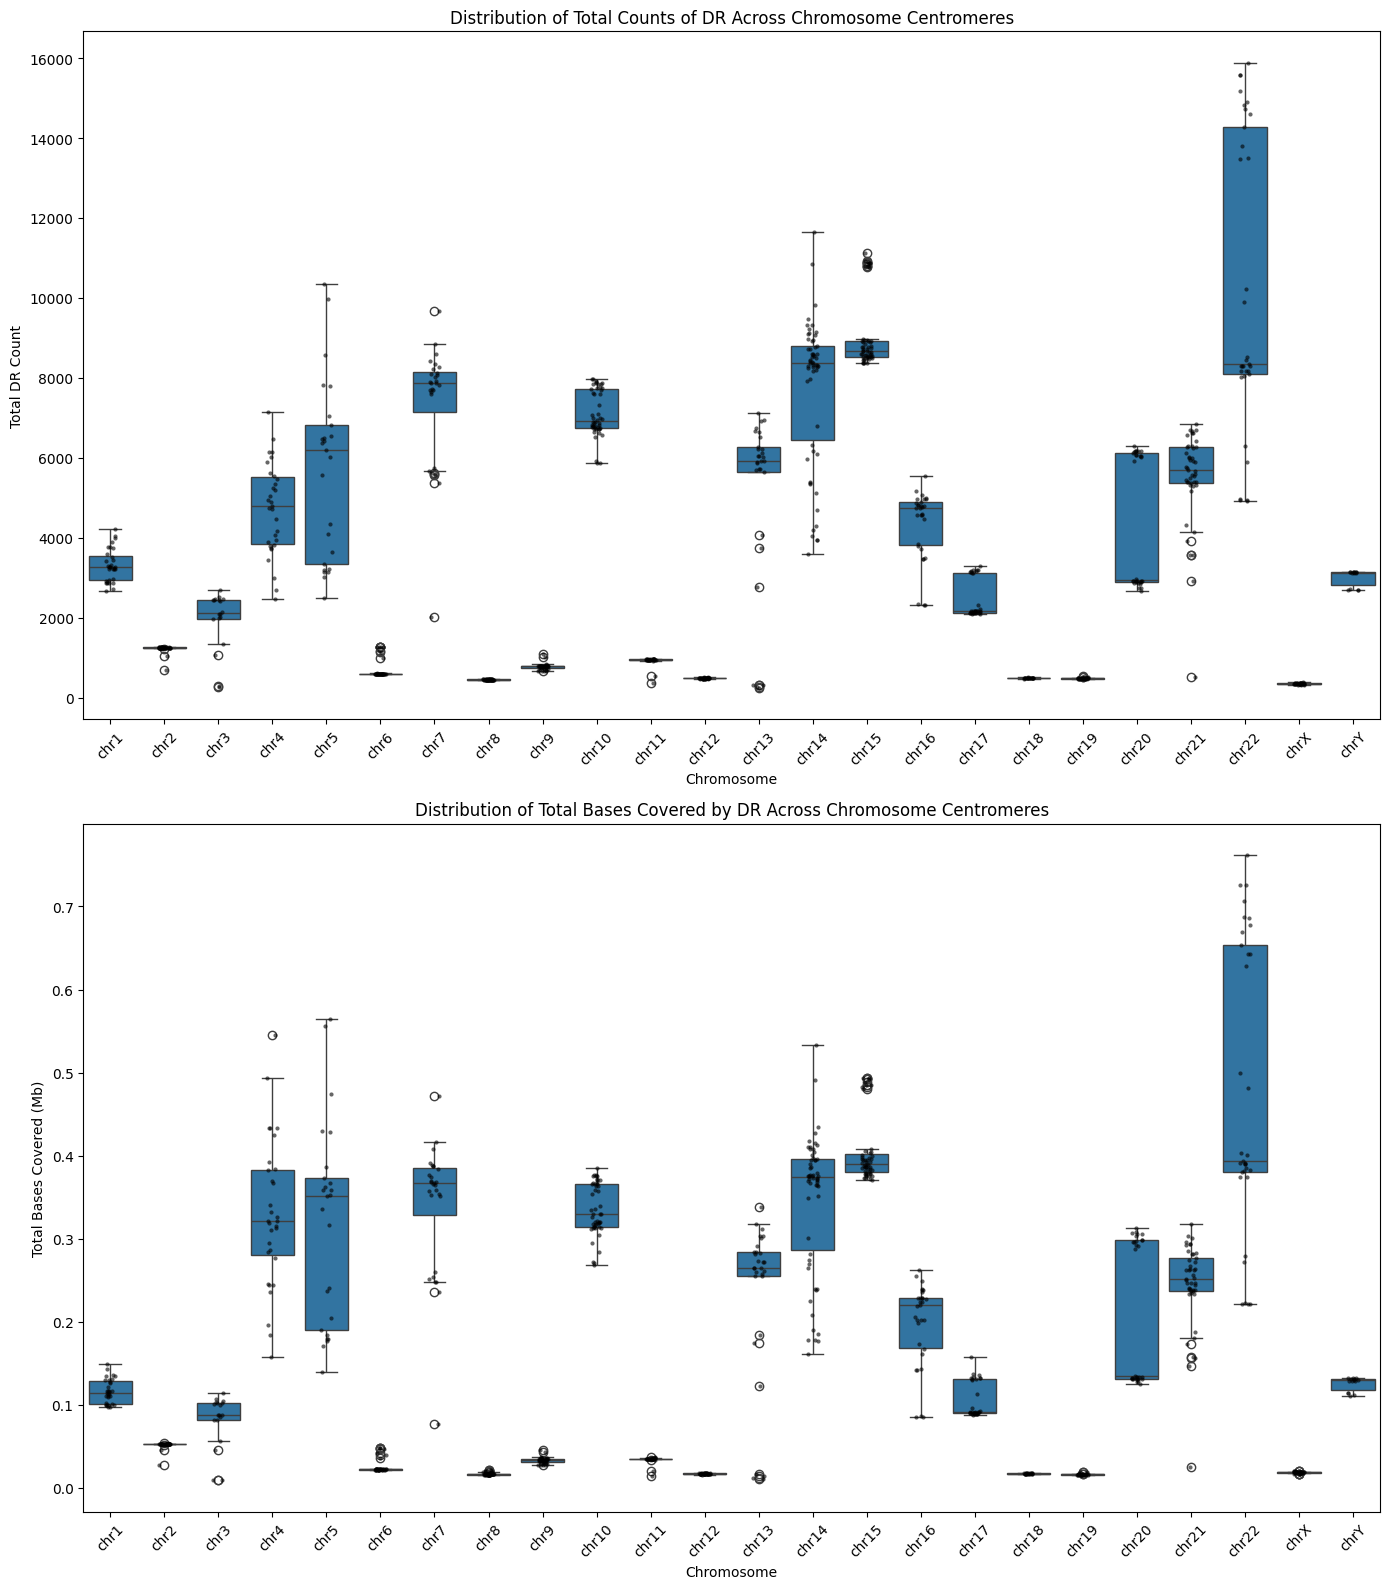

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Hypothetical file paths (assuming they are stored in the same directory)
nonb_files = sorted(glob.glob('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123/verkko123_collapsed_summary_metrics_centromere_chr*.csv'))

# Initialize an empty list to hold data
nonb_data = []

# Load data from non-B motif files and extract chromosome information from the file names
for file in nonb_files:
    df = pd.read_csv(file)
    chromosome = os.path.basename(file).split('_')[-1].replace('.csv', '')
    df['Chromosome'] = chromosome
    nonb_data.append(df)

# Concatenate all data into a single DataFrame
nonb_df = pd.concat(nonb_data, ignore_index=True)

# Define the order of chromosomes
chromosome_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']

# Convert Chromosome column to a categorical type with a specific order
nonb_df['Chromosome'] = pd.Categorical(nonb_df['Chromosome'], categories=chromosome_order, ordered=True)

# Convert Total Bases Covered from bp to Mb
nonb_df['Total Bases Covered'] = nonb_df['Total Bases Covered'] / 1e6

# List of unique motif types in the non-B motif data
motif_types = nonb_df['Motif Type'].unique()

# Plotting the distributions for each motif type across all chromosomes for Total Count and Total Bases Covered
for motif_type in motif_types:
    plt.figure(figsize=(14, 16))
    
    # Plot for Total Count
    plt.subplot(2, 1, 1)
    motif_df = nonb_df[nonb_df['Motif Type'] == motif_type]
    
    # Filter out chromosomes that don't have data for the current motif type
    valid_chromosomes = motif_df['Chromosome'].dropna().unique()
    filtered_chromosome_order = [chrom for chrom in chromosome_order if chrom in valid_chromosomes]
    
    if len(filtered_chromosome_order) > 0:
        sns.boxplot(data=motif_df, x='Chromosome', y='Total Count', order=filtered_chromosome_order)
        sns.stripplot(data=motif_df, x='Chromosome', y='Total Count', dodge=True, order=filtered_chromosome_order, size=3, alpha=0.6, color='black', legend=False)
        plt.title(f'Distribution of Total Counts of {motif_type} Across Chromosome Centromeres')
        plt.xlabel('Chromosome')
        plt.ylabel(f'Total {motif_type} Count')
        plt.xticks(rotation=45)

        # Print the number of points assigned to each box for Total Count
        print(f"\nNumber of points assigned to each box for Total Count ({motif_type}):")
        for chrom in filtered_chromosome_order:
            count = motif_df[motif_df['Chromosome'] == chrom].shape[0]
            if count > 0:
                print(f"Chromosome: {chrom}, Points: {count}")

    # Plot for Total Bases Covered in Mb
    plt.subplot(2, 1, 2)
    if len(filtered_chromosome_order) > 0:
        sns.boxplot(data=motif_df, x='Chromosome', y='Total Bases Covered', order=filtered_chromosome_order)
        sns.stripplot(data=motif_df, x='Chromosome', y='Total Bases Covered', dodge=True, order=filtered_chromosome_order, size=3, alpha=0.6, color='black', legend=False)
        plt.title(f'Distribution of Total Bases Covered by {motif_type} Across Chromosome Centromeres')
        plt.xlabel('Chromosome')
        plt.ylabel(f'Total Bases Covered (Mb)')
        plt.xticks(rotation=45)
        
        # Print the number of points assigned to each box for Total Bases Covered
        print(f"\nNumber of points assigned to each box for Total Bases Covered ({motif_type}):")
        for chrom in filtered_chromosome_order:
            count = motif_df[motif_df['Chromosome'] == chrom].shape[0]
            if count > 0:
                print(f"Chromosome: {chrom}, Points: {count}")
    
    plt.tight_layout()
    plt.show()

['NA24385' 'NA21487']

Motif Type: IR
Chromosome: chr1, Ancestry: AFR, Count: 15
Chromosome: chr1, Ancestry: Non-AFR, Count: 17
Chromosome: chr2, Ancestry: AFR, Count: 17
Chromosome: chr2, Ancestry: Non-AFR, Count: 26
Chromosome: chr3, Ancestry: AFR, Count: 9
Chromosome: chr3, Ancestry: Non-AFR, Count: 9
Chromosome: chr4, Ancestry: AFR, Count: 17
Chromosome: chr4, Ancestry: Non-AFR, Count: 14
Chromosome: chr5, Ancestry: AFR, Count: 11
Chromosome: chr5, Ancestry: Non-AFR, Count: 14
Chromosome: chr6, Ancestry: AFR, Count: 21
Chromosome: chr6, Ancestry: Non-AFR, Count: 18
Chromosome: chr7, Ancestry: AFR, Count: 13
Chromosome: chr7, Ancestry: Non-AFR, Count: 15
Chromosome: chr8, Ancestry: AFR, Count: 21
Chromosome: chr8, Ancestry: Non-AFR, Count: 24
Chromosome: chr9, Ancestry: AFR, Count: 16
Chromosome: chr9, Ancestry: Non-AFR, Count: 23
Chromosome: chr10, Ancestry: AFR, Count: 25
Chromosome: chr10, Ancestry: Non-AFR, Count: 23
Chromosome: chr11, Ancestry: AFR, Count: 13
Chromosome: chr11,

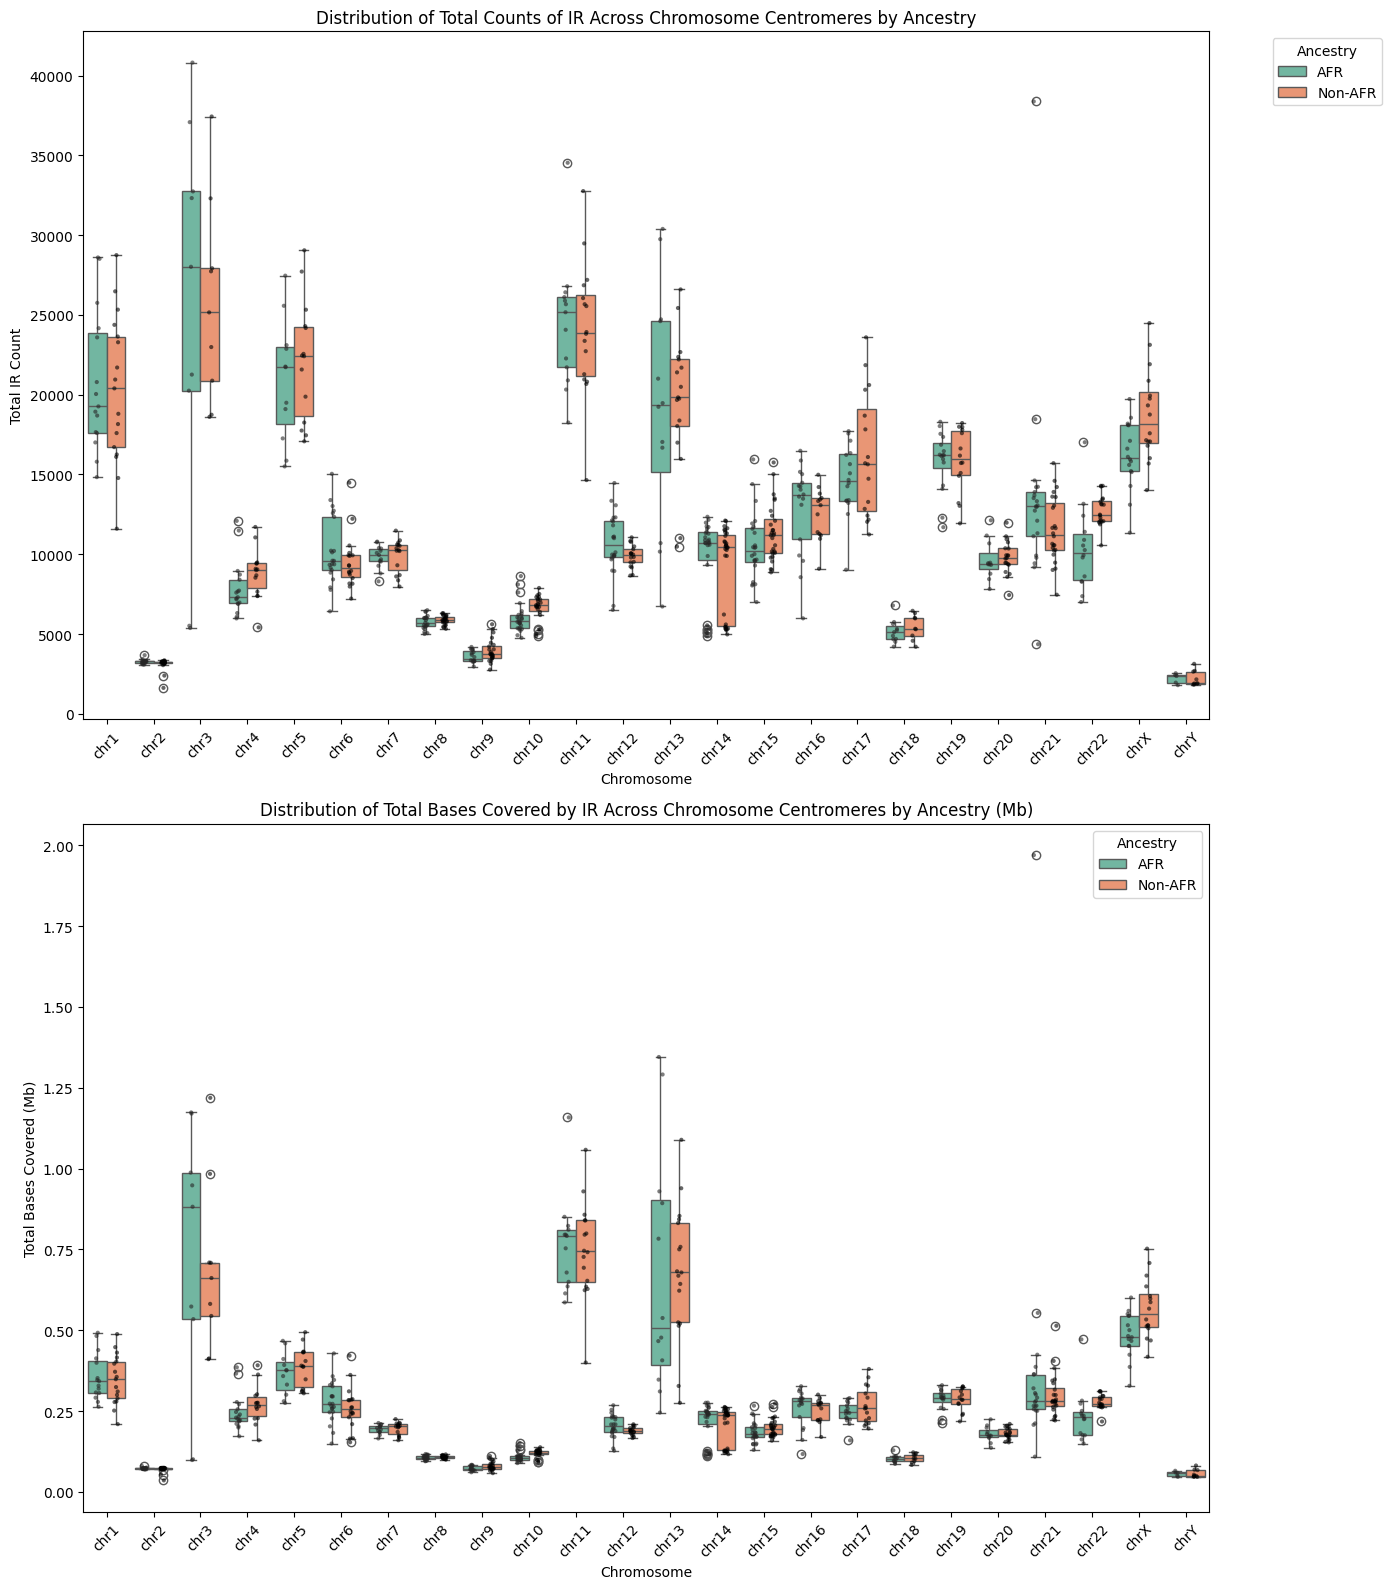


Motif Type: Z
Chromosome: chr1, Ancestry: AFR, Count: 15
Chromosome: chr1, Ancestry: Non-AFR, Count: 17
Chromosome: chr2, Ancestry: AFR, Count: 17
Chromosome: chr2, Ancestry: Non-AFR, Count: 26
Chromosome: chr3, Ancestry: AFR, Count: 9
Chromosome: chr3, Ancestry: Non-AFR, Count: 9
Chromosome: chr4, Ancestry: AFR, Count: 17
Chromosome: chr4, Ancestry: Non-AFR, Count: 14
Chromosome: chr5, Ancestry: AFR, Count: 11
Chromosome: chr5, Ancestry: Non-AFR, Count: 14
Chromosome: chr6, Ancestry: AFR, Count: 21
Chromosome: chr6, Ancestry: Non-AFR, Count: 18
Chromosome: chr7, Ancestry: AFR, Count: 13
Chromosome: chr7, Ancestry: Non-AFR, Count: 15
Chromosome: chr8, Ancestry: AFR, Count: 21
Chromosome: chr8, Ancestry: Non-AFR, Count: 24
Chromosome: chr9, Ancestry: AFR, Count: 16
Chromosome: chr9, Ancestry: Non-AFR, Count: 23
Chromosome: chr10, Ancestry: AFR, Count: 25
Chromosome: chr10, Ancestry: Non-AFR, Count: 23
Chromosome: chr11, Ancestry: AFR, Count: 13
Chromosome: chr11, Ancestry: Non-AFR, Cou

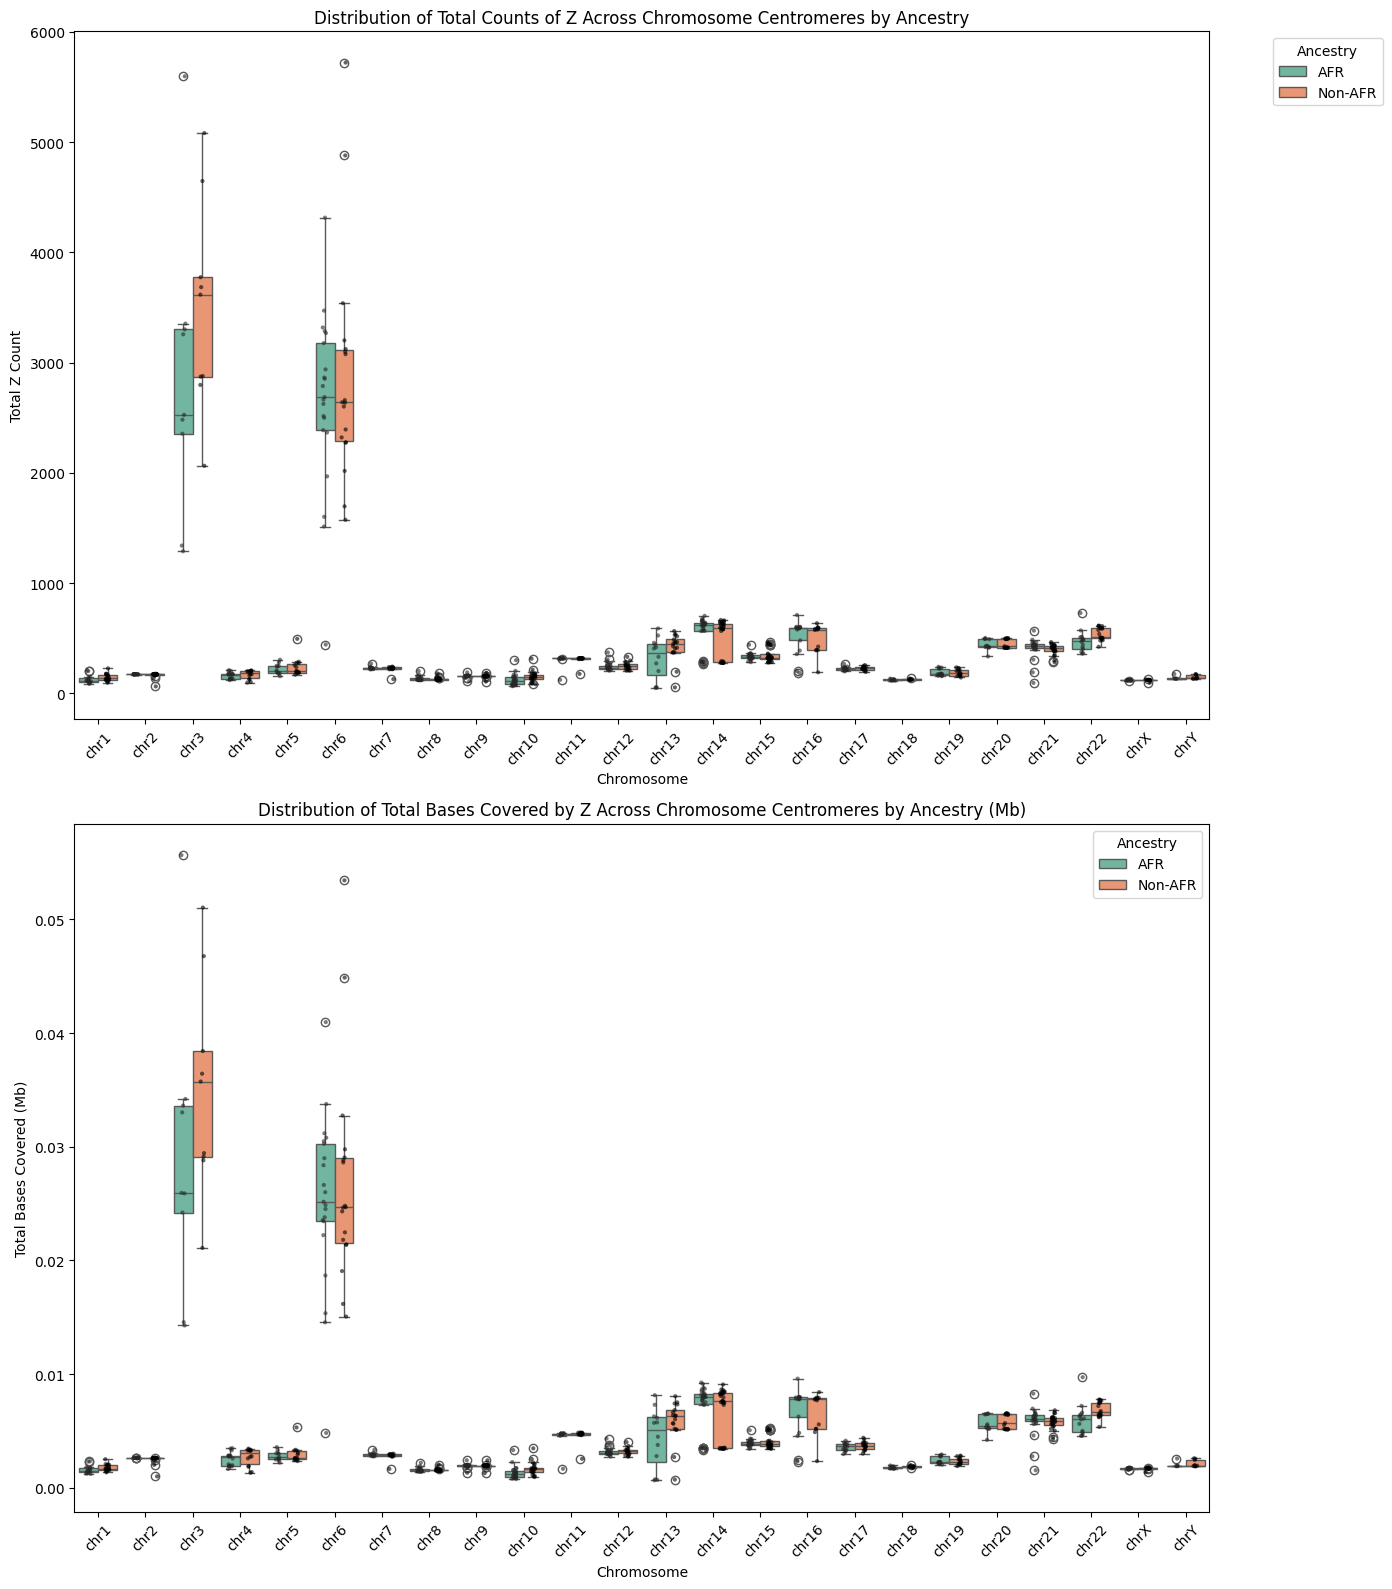


Motif Type: APR
Chromosome: chr1, Ancestry: AFR, Count: 15
Chromosome: chr1, Ancestry: Non-AFR, Count: 17
Chromosome: chr2, Ancestry: AFR, Count: 17
Chromosome: chr2, Ancestry: Non-AFR, Count: 26
Chromosome: chr3, Ancestry: AFR, Count: 9
Chromosome: chr3, Ancestry: Non-AFR, Count: 9
Chromosome: chr4, Ancestry: AFR, Count: 17
Chromosome: chr4, Ancestry: Non-AFR, Count: 14
Chromosome: chr5, Ancestry: AFR, Count: 11
Chromosome: chr5, Ancestry: Non-AFR, Count: 14
Chromosome: chr6, Ancestry: AFR, Count: 21
Chromosome: chr6, Ancestry: Non-AFR, Count: 18
Chromosome: chr7, Ancestry: AFR, Count: 13
Chromosome: chr7, Ancestry: Non-AFR, Count: 15
Chromosome: chr8, Ancestry: AFR, Count: 21
Chromosome: chr8, Ancestry: Non-AFR, Count: 24
Chromosome: chr9, Ancestry: AFR, Count: 16
Chromosome: chr9, Ancestry: Non-AFR, Count: 23
Chromosome: chr10, Ancestry: AFR, Count: 25
Chromosome: chr10, Ancestry: Non-AFR, Count: 23
Chromosome: chr11, Ancestry: AFR, Count: 13
Chromosome: chr11, Ancestry: Non-AFR, C

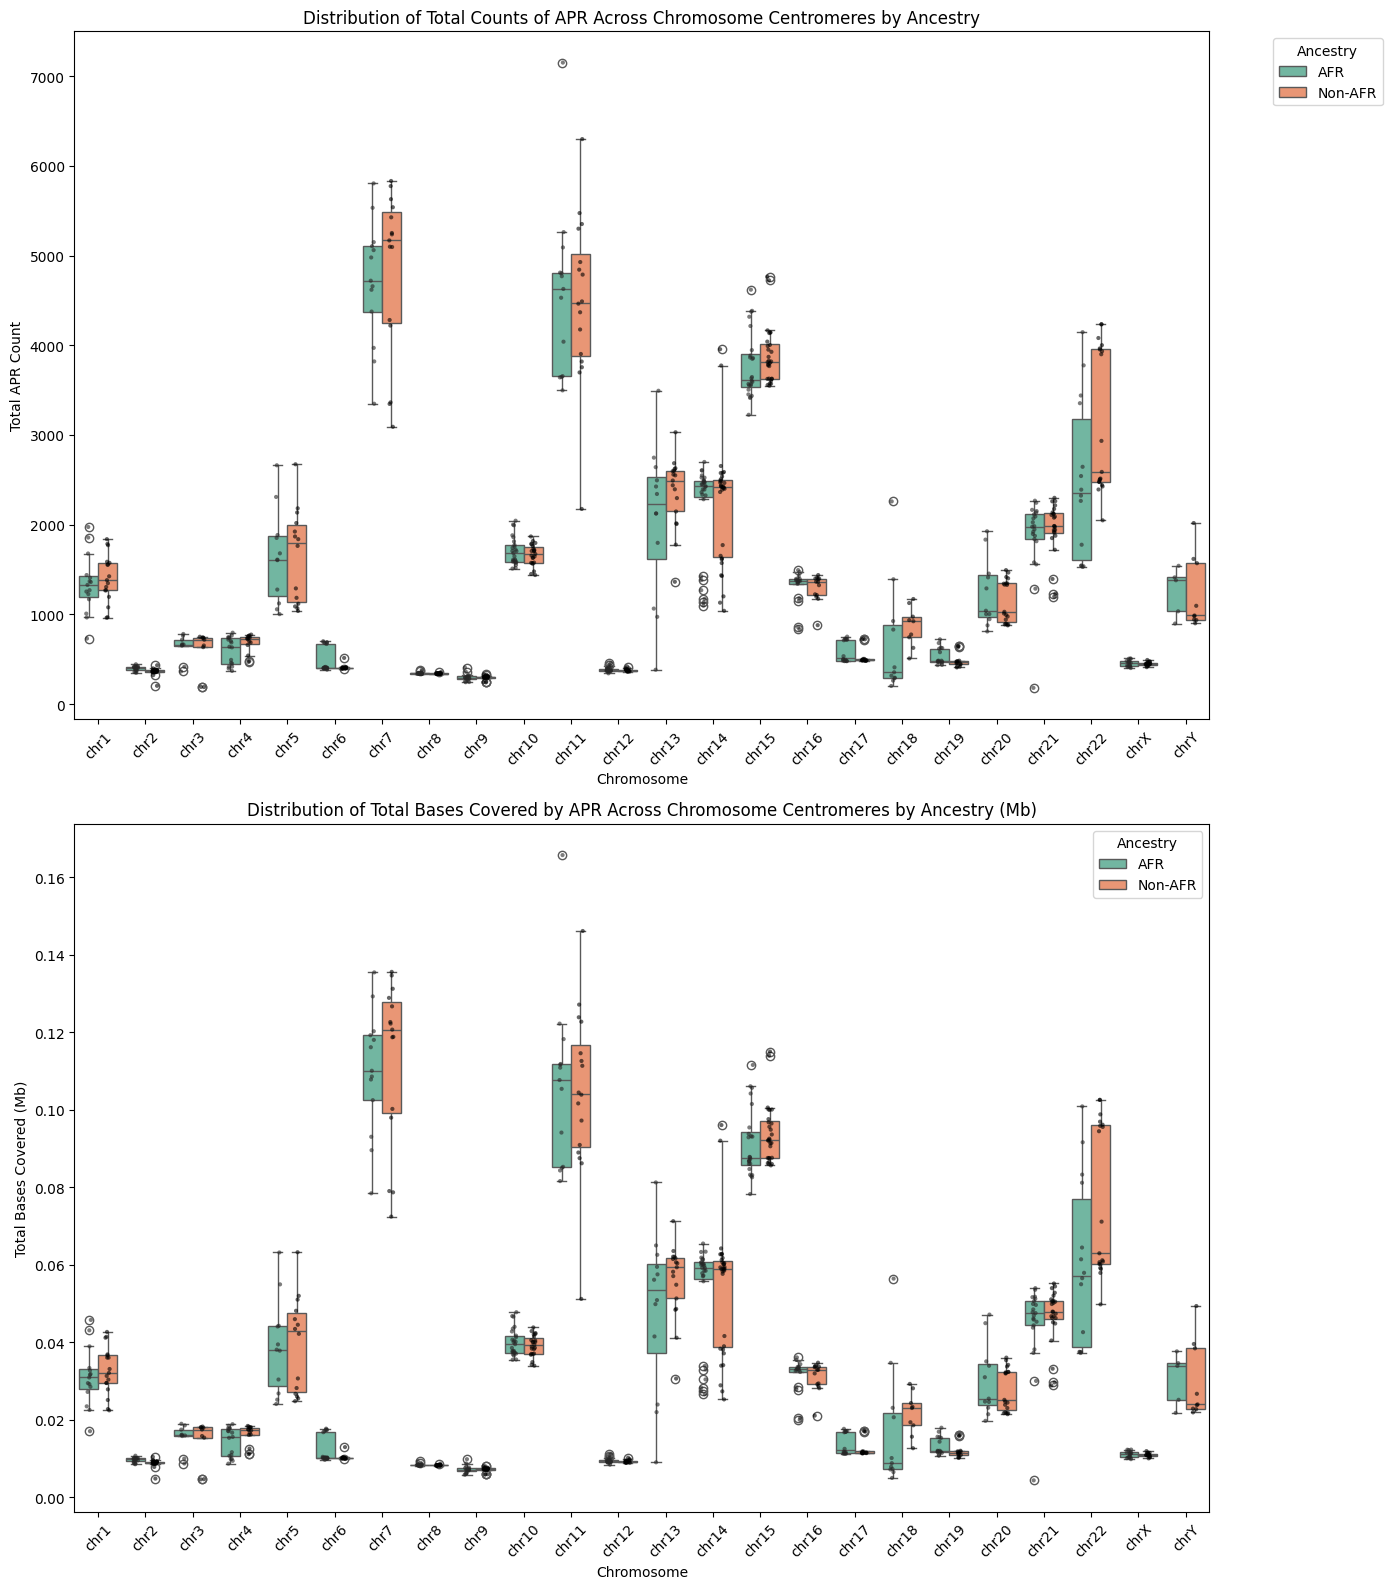


Motif Type: MR
Chromosome: chr1, Ancestry: AFR, Count: 15
Chromosome: chr1, Ancestry: Non-AFR, Count: 17
Chromosome: chr2, Ancestry: AFR, Count: 17
Chromosome: chr2, Ancestry: Non-AFR, Count: 26
Chromosome: chr3, Ancestry: AFR, Count: 9
Chromosome: chr3, Ancestry: Non-AFR, Count: 9
Chromosome: chr4, Ancestry: AFR, Count: 17
Chromosome: chr4, Ancestry: Non-AFR, Count: 14
Chromosome: chr5, Ancestry: AFR, Count: 11
Chromosome: chr5, Ancestry: Non-AFR, Count: 14
Chromosome: chr6, Ancestry: AFR, Count: 21
Chromosome: chr6, Ancestry: Non-AFR, Count: 18
Chromosome: chr7, Ancestry: AFR, Count: 13
Chromosome: chr7, Ancestry: Non-AFR, Count: 15
Chromosome: chr8, Ancestry: AFR, Count: 21
Chromosome: chr8, Ancestry: Non-AFR, Count: 24
Chromosome: chr9, Ancestry: AFR, Count: 16
Chromosome: chr9, Ancestry: Non-AFR, Count: 23
Chromosome: chr10, Ancestry: AFR, Count: 25
Chromosome: chr10, Ancestry: Non-AFR, Count: 23
Chromosome: chr11, Ancestry: AFR, Count: 13
Chromosome: chr11, Ancestry: Non-AFR, Co

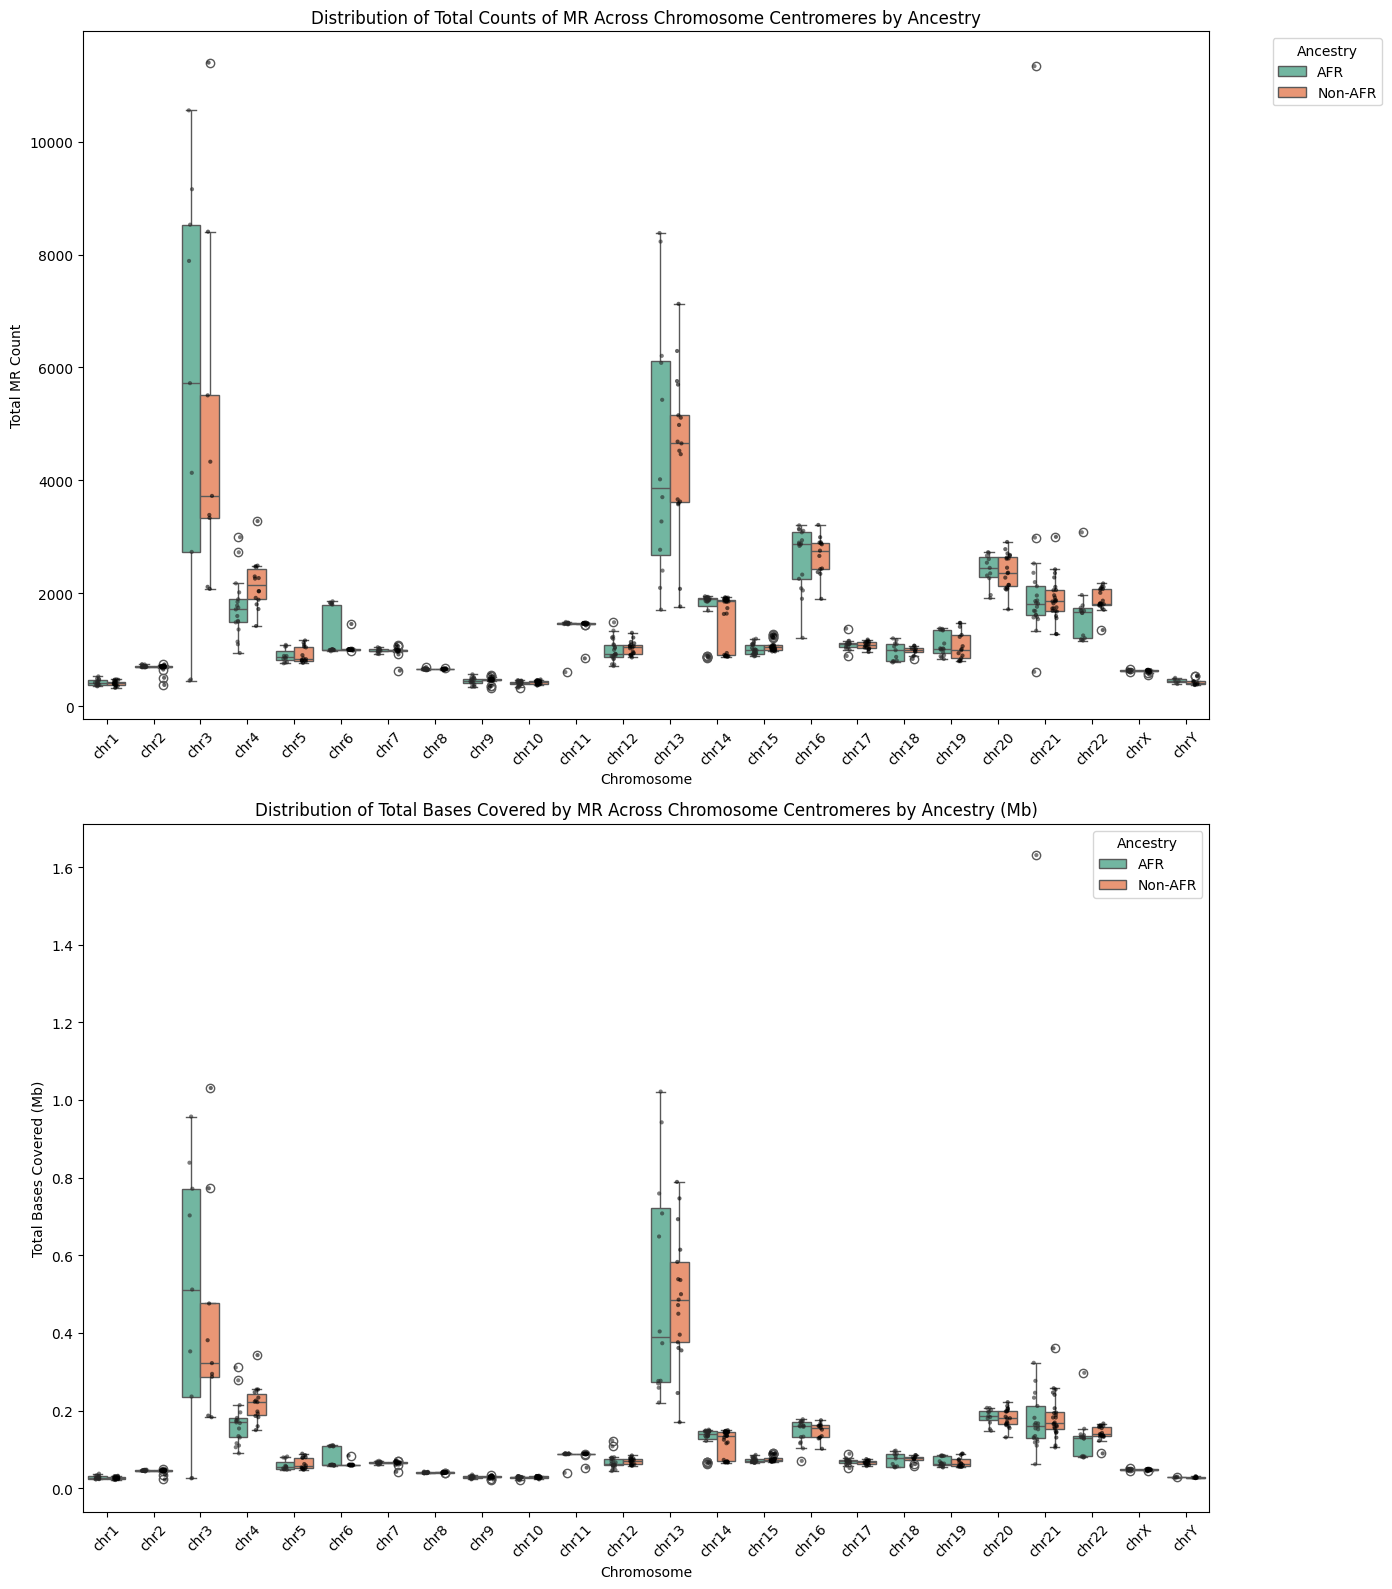


Motif Type: DR
Chromosome: chr1, Ancestry: AFR, Count: 15
Chromosome: chr1, Ancestry: Non-AFR, Count: 17
Chromosome: chr2, Ancestry: AFR, Count: 17
Chromosome: chr2, Ancestry: Non-AFR, Count: 26
Chromosome: chr3, Ancestry: AFR, Count: 9
Chromosome: chr3, Ancestry: Non-AFR, Count: 9
Chromosome: chr4, Ancestry: AFR, Count: 17
Chromosome: chr4, Ancestry: Non-AFR, Count: 14
Chromosome: chr5, Ancestry: AFR, Count: 11
Chromosome: chr5, Ancestry: Non-AFR, Count: 14
Chromosome: chr6, Ancestry: AFR, Count: 21
Chromosome: chr6, Ancestry: Non-AFR, Count: 18
Chromosome: chr7, Ancestry: AFR, Count: 13
Chromosome: chr7, Ancestry: Non-AFR, Count: 15
Chromosome: chr8, Ancestry: AFR, Count: 21
Chromosome: chr8, Ancestry: Non-AFR, Count: 24
Chromosome: chr9, Ancestry: AFR, Count: 16
Chromosome: chr9, Ancestry: Non-AFR, Count: 23
Chromosome: chr10, Ancestry: AFR, Count: 25
Chromosome: chr10, Ancestry: Non-AFR, Count: 23
Chromosome: chr11, Ancestry: AFR, Count: 13
Chromosome: chr11, Ancestry: Non-AFR, Co

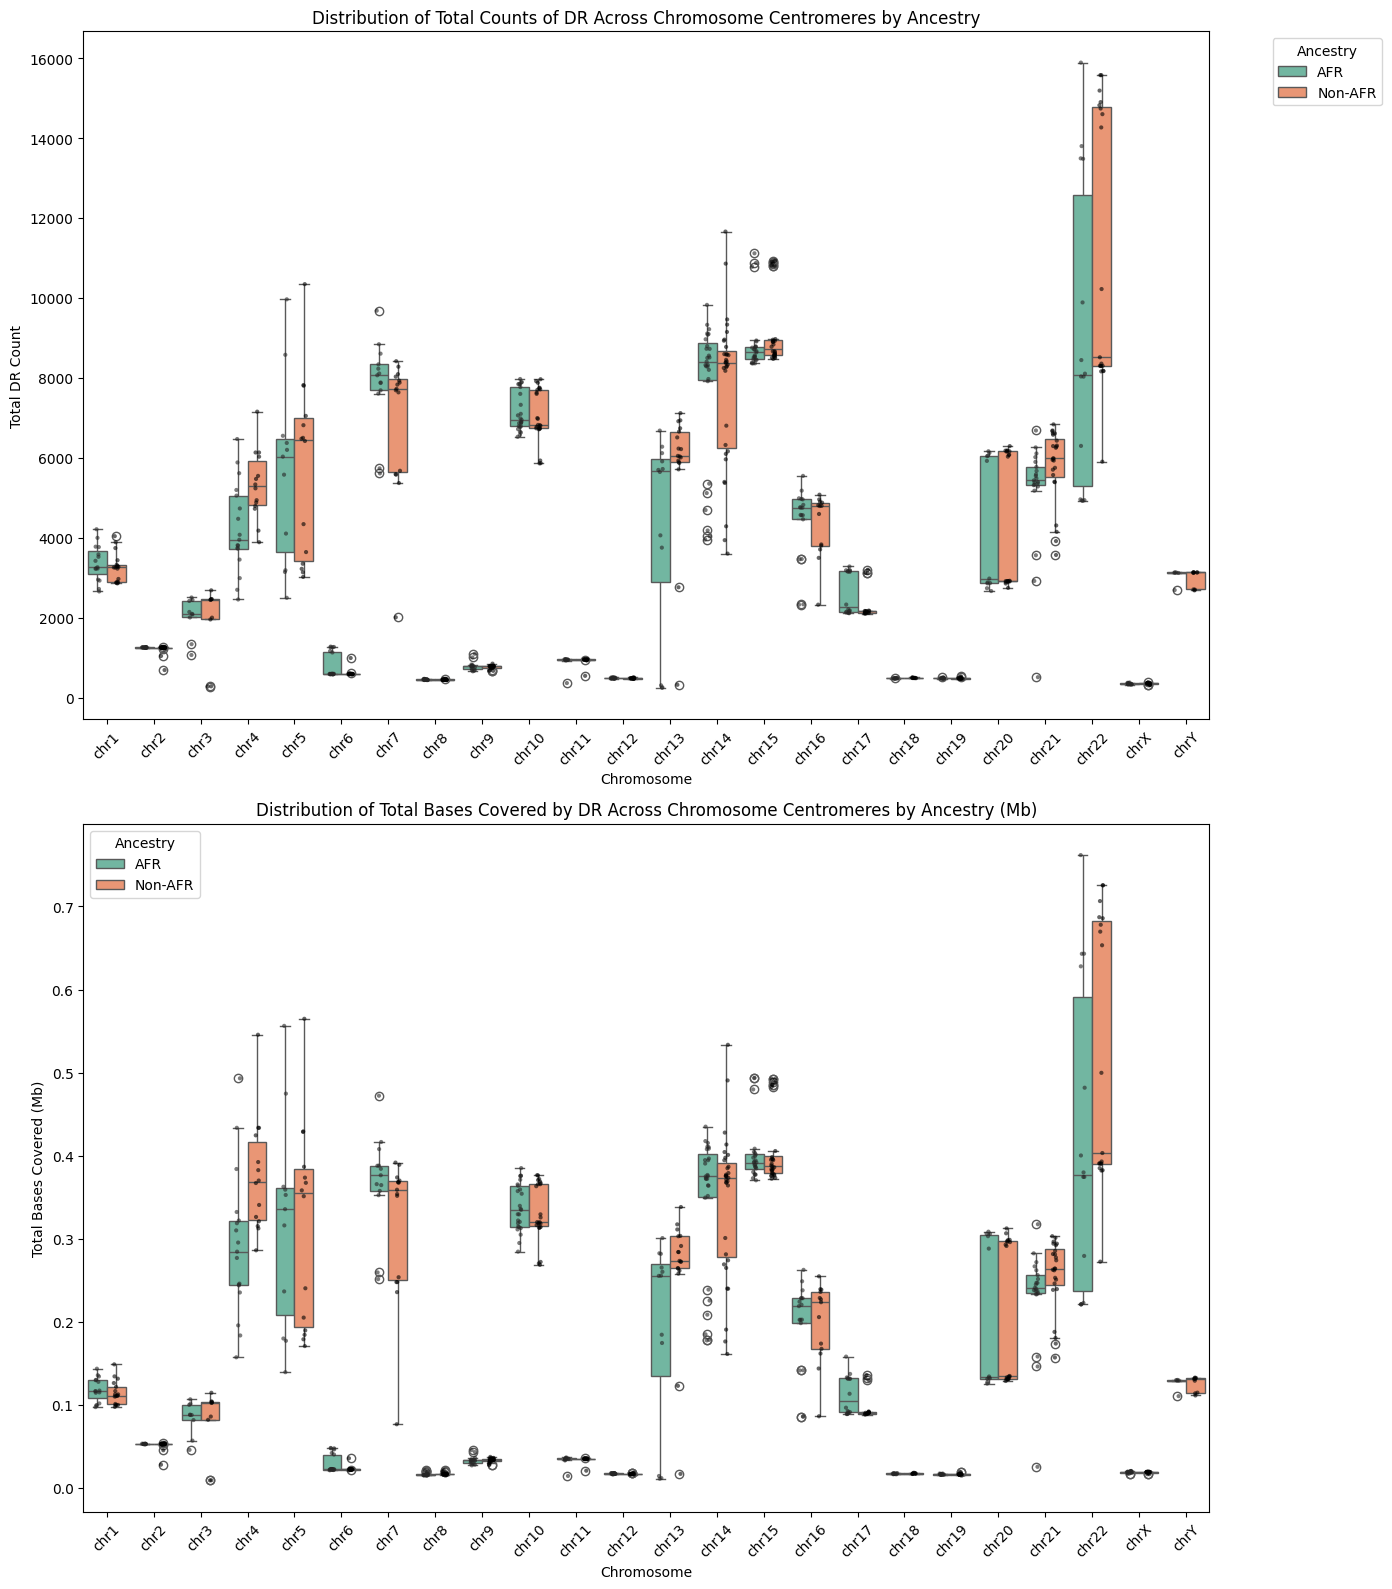

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Paths
base_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123/'
metadata_path = '/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv'  # Update this with the actual path to your metadata file

# Load metadata
metadata_df = pd.read_csv(metadata_path, delimiter='\t')

# Standardize the case and strip whitespace in the metadata's Sample name
metadata_df['Sample name'] = metadata_df['Sample name'].str.upper().str.strip()

# Load data from non-B motif files
nonb_files = sorted(glob.glob(base_path + 'verkko123_collapsed_summary_metrics_centromere_chr*.csv'))
nonb_data = []

for file in nonb_files:
    df = pd.read_csv(file)
    chromosome = os.path.basename(file).split('_')[-1].replace('.csv', '')
    df['Chromosome'] = chromosome
    
    # Extract Sample_Haplotype and Sample from Sample_Haplotype_Chromosome
    df['Sample'] = df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d{5}|NA\d{5})')[0]
    df['Sample_Haplotype'] = df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d{5}_hap\d|NA\d{5}_hap\d)')[0]
    
    nonb_data.append(df)

# Concatenate all data into a single DataFrame
nonb_df = pd.concat(nonb_data, ignore_index=True)

# Merge metadata with the non-B motif data
merged_data = pd.merge(nonb_df, metadata_df[['Sample name', 'Superpopulation name']], left_on='Sample', right_on='Sample name', how='left')

# Identify samples that were not matched
unmatched_samples = merged_data[merged_data['Superpopulation name'].isnull()]
if not unmatched_samples.empty:
    print("Warning: The following samples were not matched with metadata:")
    print(unmatched_samples['Sample'].unique())

# Categorize into African vs Non-African
merged_data['Ancestry'] = merged_data['Superpopulation name'].apply(lambda x: 'AFR' if x == 'African Ancestry' else 'Non-AFR')

# Convert Total Bases Covered from bp to Mb
merged_data['Total Bases Covered'] = merged_data['Total Bases Covered'] / 1e6

# Define the order of chromosomes
chromosome_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']
merged_data['Chromosome'] = pd.Categorical(merged_data['Chromosome'], categories=chromosome_order, ordered=True)

# List of unique motif types in the non-B motif data
motif_types = merged_data['Motif Type'].unique()

# Plotting the distributions for each motif type across all chromosomes, separated by ancestry
for motif_type in motif_types:
    print(f"\nMotif Type: {motif_type}")
    
    plt.figure(figsize=(14, 16))
    
    # Plot for Total Count
    plt.subplot(2, 1, 1)
    motif_df = merged_data[merged_data['Motif Type'] == motif_type]
    
    # Filter out chromosomes that don't have data for the current motif type
    valid_chromosomes = motif_df['Chromosome'].dropna().unique()
    filtered_chromosome_order = [chrom for chrom in chromosome_order if chrom in valid_chromosomes]
    
    # Print number of points for each bar
    for chrom in filtered_chromosome_order:
        for ancestry in ['AFR', 'Non-AFR']:
            count = len(motif_df[(motif_df['Chromosome'] == chrom) & (motif_df['Ancestry'] == ancestry)])
            if count > 0:
                print(f"Chromosome: {chrom}, Ancestry: {ancestry}, Count: {count}")

    if len(filtered_chromosome_order) > 0:
        sns.boxplot(data=motif_df, x='Chromosome', y='Total Count', hue='Ancestry', order=filtered_chromosome_order, palette='Set2', dodge=True)
        sns.stripplot(data=motif_df, x='Chromosome', y='Total Count', hue='Ancestry', order=filtered_chromosome_order, size=3, alpha=0.6, palette='dark:black', dodge=True, legend=False)

        # Remove duplicate entries in the legend
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(), title='Ancestry', bbox_to_anchor=(1.05, 1), loc='upper left')

        plt.title(f'Distribution of Total Counts of {motif_type} Across Chromosome Centromeres by Ancestry')
        plt.xlabel('Chromosome')
        plt.ylabel(f'Total {motif_type} Count')
        plt.xticks(rotation=45)

    # Plot for Total Bases Covered in Mb
    plt.subplot(2, 1, 2)
    if len(filtered_chromosome_order) > 0:
        sns.boxplot(data=motif_df, x='Chromosome', y='Total Bases Covered', hue='Ancestry', order=filtered_chromosome_order, palette='Set2', dodge=True)
        sns.stripplot(data=motif_df, x='Chromosome', y='Total Bases Covered', hue='Ancestry', order=filtered_chromosome_order, size=3, alpha=0.6, palette='dark:black', dodge=True, legend=False)

        plt.title(f'Distribution of Total Bases Covered by {motif_type} Across Chromosome Centromeres by Ancestry (Mb)')
        plt.xlabel('Chromosome')
        plt.ylabel('Total Bases Covered (Mb)')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

<Figure size 1800x1000 with 0 Axes>

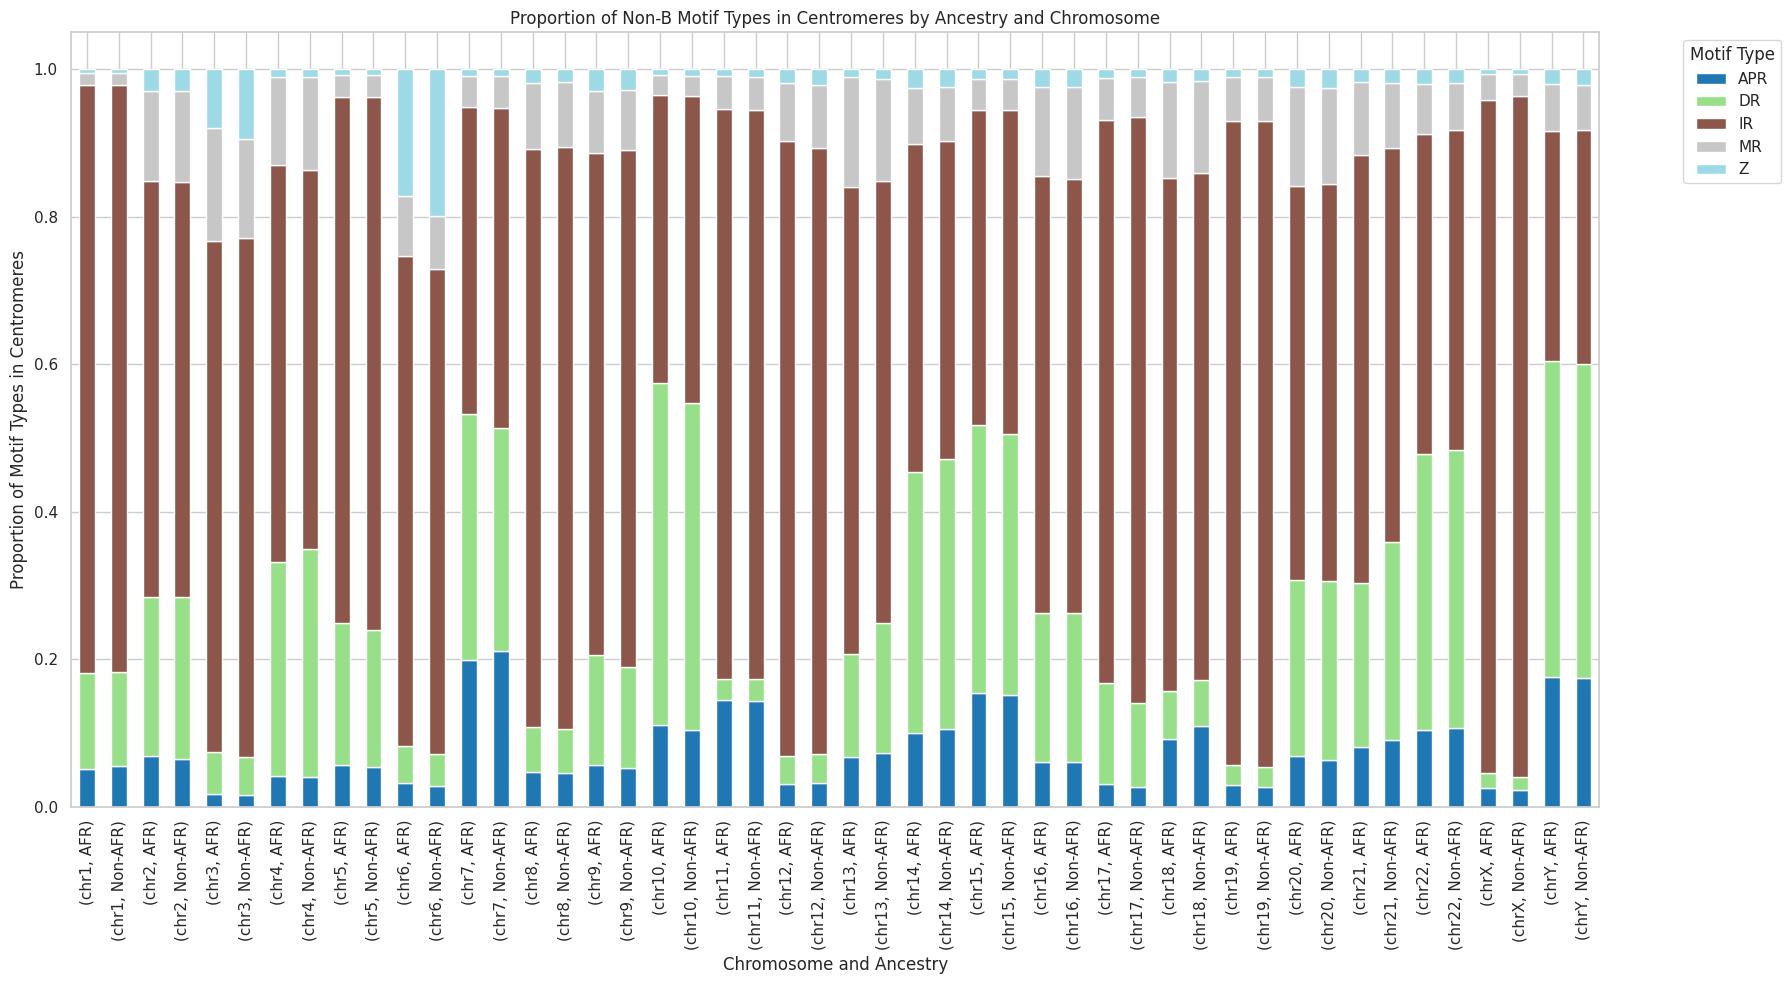

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Paths
base_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123/'
metadata_path = '/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv'  # Update with the correct path

# Load metadata
metadata_df = pd.read_csv(metadata_path, delimiter='\t')

# Load data from non-B motif files
nonb_files = sorted(glob.glob(base_path + 'verkko123_collapsed_summary_metrics_centromere_chr*.csv'))
nonb_data = []

for file in nonb_files:
    df = pd.read_csv(file)
    chromosome = os.path.basename(file).split('_')[-1].replace('.csv', '')
    df['Chromosome'] = chromosome
    
    # Extract Sample and Sample_Haplotype from Sample_Haplotype_Chromosome
    df['Sample'] = df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d{5}|NA\d{5})')[0]
    df['Sample_Haplotype'] = df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d{5}_hap\d|NA\d{5}_hap\d)')[0]
    
    nonb_data.append(df)

# Concatenate all data into a single DataFrame
nonb_df = pd.concat(nonb_data, ignore_index=True)

# Merge metadata with the non-B motif data
merged_data = pd.merge(nonb_df, metadata_df[['Sample name', 'Superpopulation name']], left_on='Sample', right_on='Sample name', how='left')

# Categorize into African vs Non-African
merged_data['Ancestry'] = merged_data['Superpopulation name'].apply(lambda x: 'AFR' if x == 'African Ancestry' else 'Non-AFR')

# Define the order of chromosomes for proper ordering
chromosome_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']
merged_data['Chromosome'] = pd.Categorical(merged_data['Chromosome'], categories=chromosome_order, ordered=True)

# Calculate total motif count per ancestry, motif type, and chromosome
motif_summary = merged_data.groupby(['Chromosome', 'Ancestry', 'Motif Type'], observed=False)['Total Count'].sum().reset_index()

# Calculate the proportion of each motif type within each ancestry group for each chromosome
total_counts_per_ancestry_chr = motif_summary.groupby(['Chromosome', 'Ancestry'], observed=False)['Total Count'].sum().reset_index()
motif_summary = pd.merge(motif_summary, total_counts_per_ancestry_chr, on=['Chromosome', 'Ancestry'], suffixes=('', '_Total'))
motif_summary['Proportion'] = motif_summary['Total Count'] / motif_summary['Total Count_Total']

# Pivot the data to get motif types as columns for easier plotting
motif_pivot = motif_summary.pivot_table(index=['Chromosome', 'Ancestry'], columns='Motif Type', values='Proportion', observed=False).fillna(0)

# Reset index to have a flat DataFrame for plotting
motif_pivot = motif_pivot.reset_index()

# Plotting the stacked bar plot for all chromosomes, side by side for AFR vs Non-AFR
plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")

# Set index and plot the stacked bar chart
motif_pivot.set_index(['Chromosome', 'Ancestry']).plot(kind='bar', stacked=True, figsize=(18, 10), colormap='tab20')

plt.title('Proportion of Non-B Motif Types in Centromeres by Ancestry and Chromosome')
plt.xlabel('Chromosome and Ancestry')
plt.ylabel('Proportion of Motif Types in Centromeres')
plt.xticks(rotation=90)
plt.legend(title='Motif Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [38]:
# Add centromere lengths for CHM13 in megabases (Mb)
chm13_centromere_lengths = {
    'chr1': 4.504439,
    'chr2': 2.33948,
    'chr3': 4.677024,
    'chr4': 5.494641,
    'chr5': 2.557491,
    'chr6': 2.771684,
    'chr7': 3.300127,
    'chr8': 2.109248,
    'chr9': 2.63082,
    'chr10': 2.030796,
    'chr11': 3.415049,
    'chr12': 2.581652,
    'chr13': 1.950698,
    'chr14': 2.616299,
    'chr15': 1.015672,
    'chr16': 1.981235,
    'chr17': 3.59452,
    'chr18': 4.967851,
    'chr19': 3.950495,
    'chr20': 2.173803,
    'chr21': 0.343352,
    'chr22': 2.922885,
    'chrX': 3.106918,
    'chrY': 0.317335
}
# Sum of values in the dictionary
total_sum = sum(chm13_centromere_lengths.values())
print(f"Total sum of values CHM13: {total_sum}")

# HG38 centromere lengths calculated earlier (in Mb)
hg38_centromere_lengths = {
    'chr1': 2.906265,
    'chr2': 1.902412,
    'chr3': 2.883116,
    'chr4': 2.031890,
    'chr5': 3.573907,
    'chr6': 1.276046,
    'chr7': 3.358367,
    'chr8': 1.843521,
    'chr9': 2.128923,
    'chr10': 1.906839,
    'chr11': 3.346726,
    'chr12': 2.415845,
    'chr13': 2.051248,
    'chr14': 2.173523,
    'chr15': 2.641581,
    'chr16': 1.954511,
    'chr17': 3.802485,
    'chr18': 5.400307,
    'chr19': 2.691894,
    'chr20': 3.602116,
    'chr21': 2.051248,
    'chr22': 2.099530,
    'chrX': 3.806963,
    'chrY': 0.227095
}

total_sum2 = sum(hg38_centromere_lengths.values())
print(f"Total sum of values HG38: {total_sum2}")

Total sum of values CHM13: 67.353514
Total sum of values HG38: 62.076358000000006
